In [51]:
# Importamos los paquetes necesarios
import pandas as pd
import plotnine as p9
import numpy as np
import matplotlib.pyplot as plt
from optbinning import OptimalBinning

# Libreria Propia
import utils as ut

import importlib

## 1. Carga del dataset

In [52]:
data_path = '../data/diabetes_prediction_dataset.csv'
data = pd.read_csv(data_path, sep=',')
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Por último, tenemos _blood\_glucose\_level_ que a pesar de ser una variable entera, se considera como una variable contínua, debido al gran número de categorías que harían falta para describirla si no. El resto de variables son variables contínuas de por sçi (aunque la edad se podría de nuevo considerar categórica, pero esto no sería útil).  

Observando los estadisticos del `.describe()`, podemos intuir la proporción de individuos con problemas cardíacos con un $3.94\%$, aquellos con diabetes conforman el $8.5\%$ y los que tienen hipertensión son el $7.49\%$.

## 1.1. Inspección inicial

In [53]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  str    
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  str    
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), str(2)
memory usage: 6.9 MB


Creamos una lista con las variables numéricas, dejando de lado a diabetes ya que es nuestra variable objetivo y otro con las variables categóricas.

In [54]:
numeric_var = data.select_dtypes(include='number').columns.tolist()
numeric_var.remove('diabetes')
numeric_var

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level']

In [55]:
categoric_var = [var for var in data.columns.tolist() if var not in numeric_var]
categoric_var

['gender', 'smoking_history', 'diabetes']

#### Primeras impresiones

En primer lugar vamos a observar el tipo de datos que tenemos en búsqueda de errores de formato, _missing values_ u otro tipo de inconsistencias en el _data frame_.

Tenemos un dataset con 100.000 observaciones, se ve que sólo existen dos columnas que no son numéricas, estas son el **género y el historial como fumador (o no)**. Estas dos columnas serán tratadas como variables categóricas, asi como también la variable objetivo.

- **No hay missing values explícitos** -> PERO no garantiza ausencia de “missing lógicos”

## 2. Análisis de variables
### 2.1 Análisis univariante, variables numéricas.
Definimos colores y tamaños de los gráficos

In [56]:
color_general = 'steelblue'
color_mean = 'red'
color_median = 'black'
fig_size_histogram = (5,4)
fig_size_box_plot = (3,4)
fig_size_desc = (2,4)

### Age

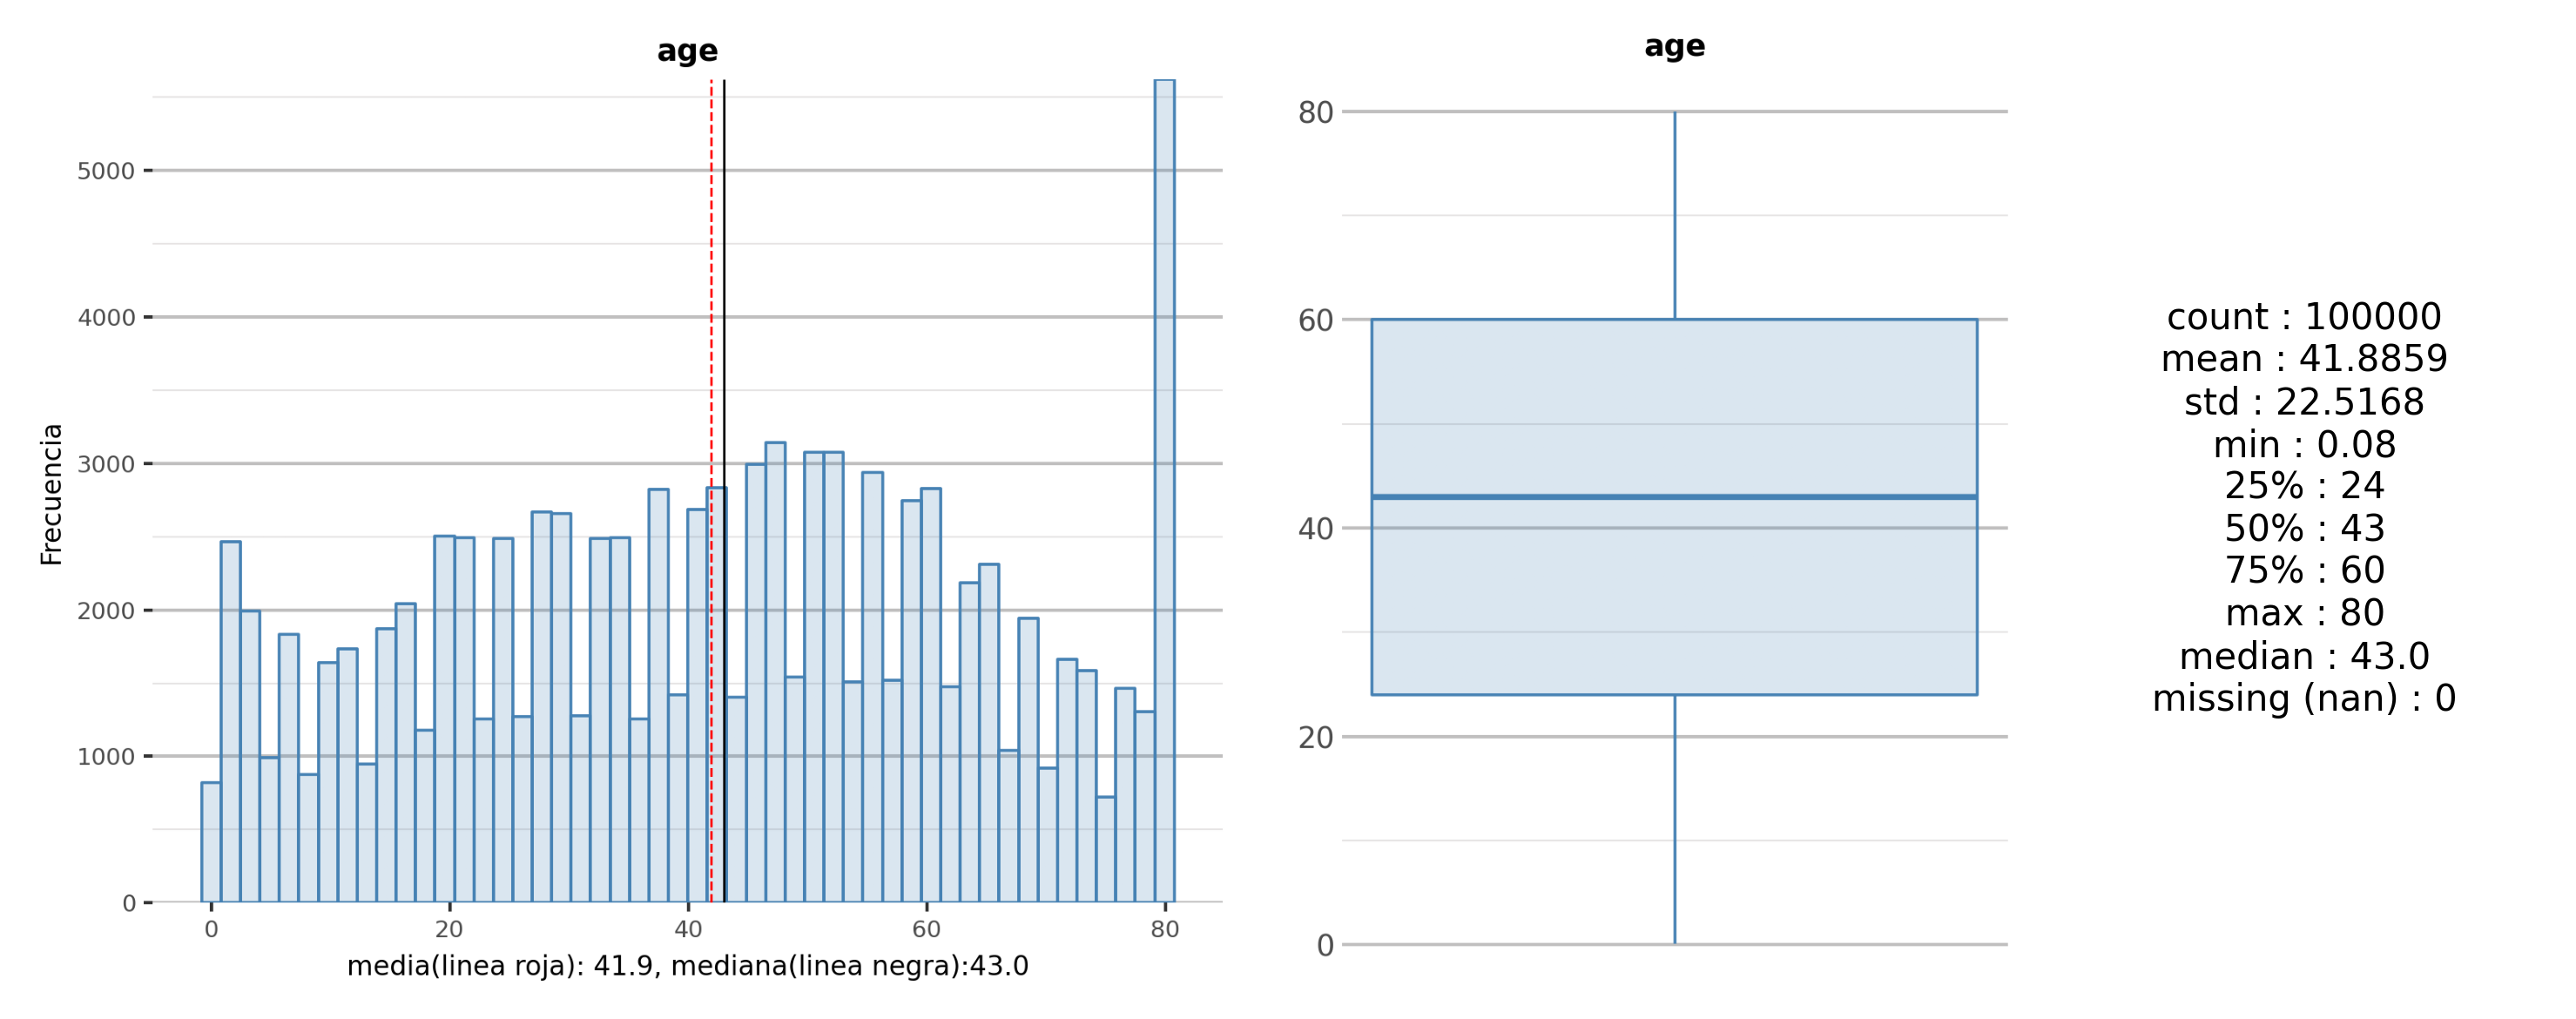

In [57]:
col = numeric_var[0]
histogram_plot = ut.histogram_plot(data,col,color_general,color_mean,color_median,fig_size_histogram)
box_plot = ut.box_plot(data,col,color_general,fig_size_box_plot)
desc_text = ut.desc_plot(data,col)
plot_var_cuantitative = ut.plot_var_cuantitative(histogram_plot,box_plot,desc_text,fig_size_histogram,fig_size_box_plot,fig_size_desc)
plt.tight_layout()
plt.show()

Observamos con estas gráficas cómo la distribución de la variable edad, aunque en el *boxplot* no se observa ningún *outlier*, sí que podemos observar como el número de cuentas del rango de edad con $80$ años es muy grande, mucho myor que el de cualquier otro grupo de edad. Esto puede ser importante a la hora de hacer un modelo ya que al tener tantas observaciones de ese grupo, las conclusiones estarán sesgadas para predecir especialmente bien en dicho grupo.


- La edad presenta un rango amplio (0.08–80 años), coherente con una población general que incluye desde recién nacidos hasta adultos mayores.
- La media (≈41.8) y la mediana (43) son muy próximas, lo que indica ausencia de asimetrías extremas.
- La distribución es relativamente homogénea, sin picos anómalos ni concentraciones artificiales.
- No se detectan outliers extremos ni valores clínicamente imposibles.
- La variabilidad observada es elevada (std ≈22.5), esperable dada la heterogeneidad de edades.
- La variable no requiere tratamiento previo para el análisis bi-variante

### hypertension

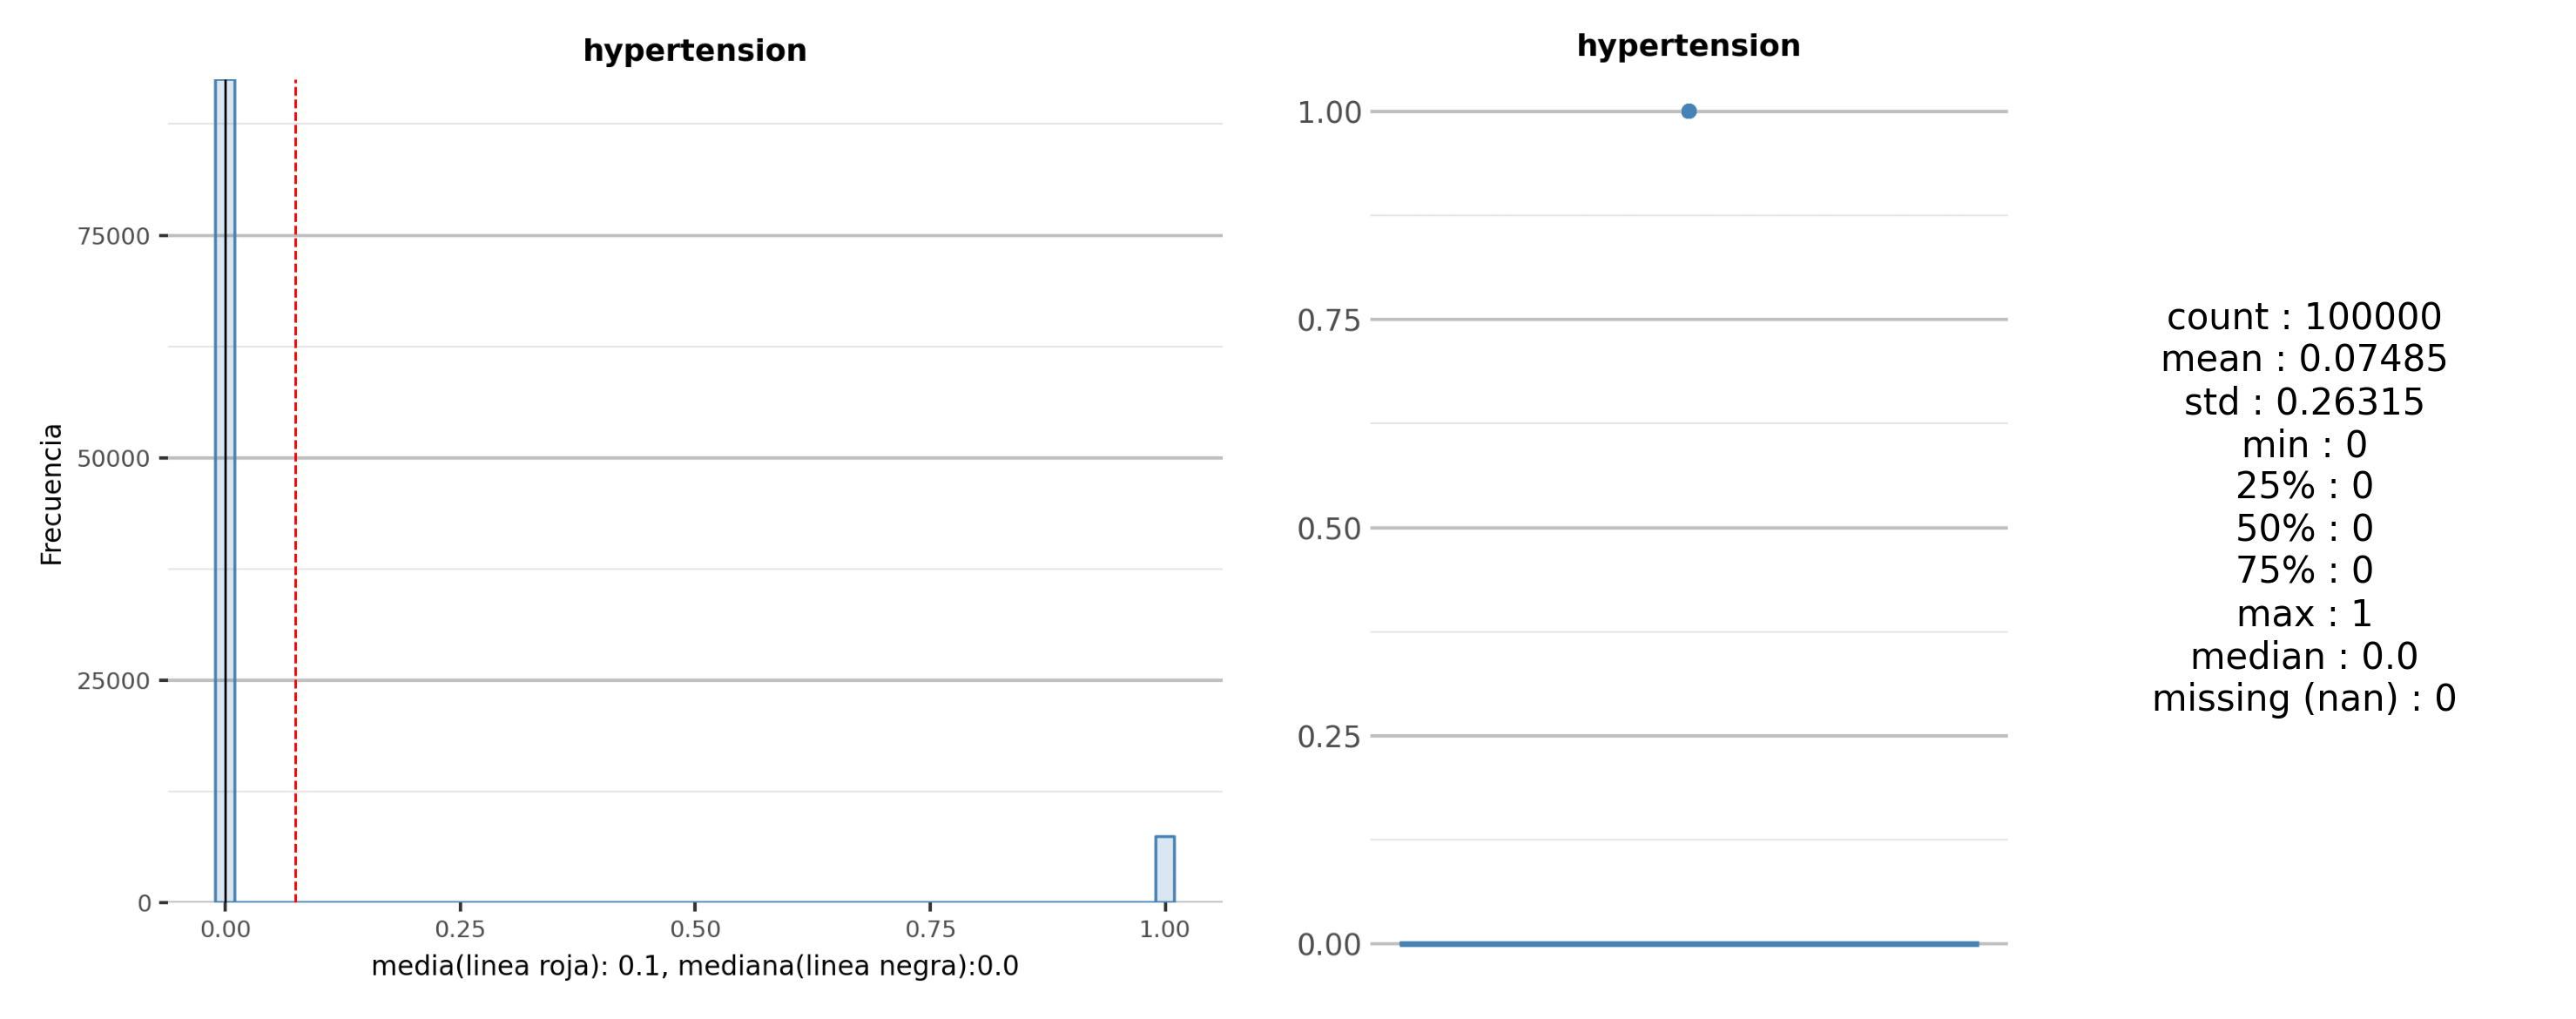

In [58]:
col = numeric_var[1]
histogram_plot = ut.histogram_plot(data,col,color_general,color_mean,color_median,fig_size_histogram)
box_plot = ut.box_plot(data,col,color_general,fig_size_box_plot)
desc_text = ut.desc_plot(data,col)
plot_var_cuantitative = ut.plot_var_cuantitative(histogram_plot,box_plot,desc_text,fig_size_histogram,fig_size_box_plot,fig_size_desc)
plt.tight_layout()
plt.show()

_hypertension_ es numérica pero solo toma los valores de $(0,1)$,  o `False`/`True`, en consecuencia de ahora en adelante se tratara como una variable categórica.

### heart_disease

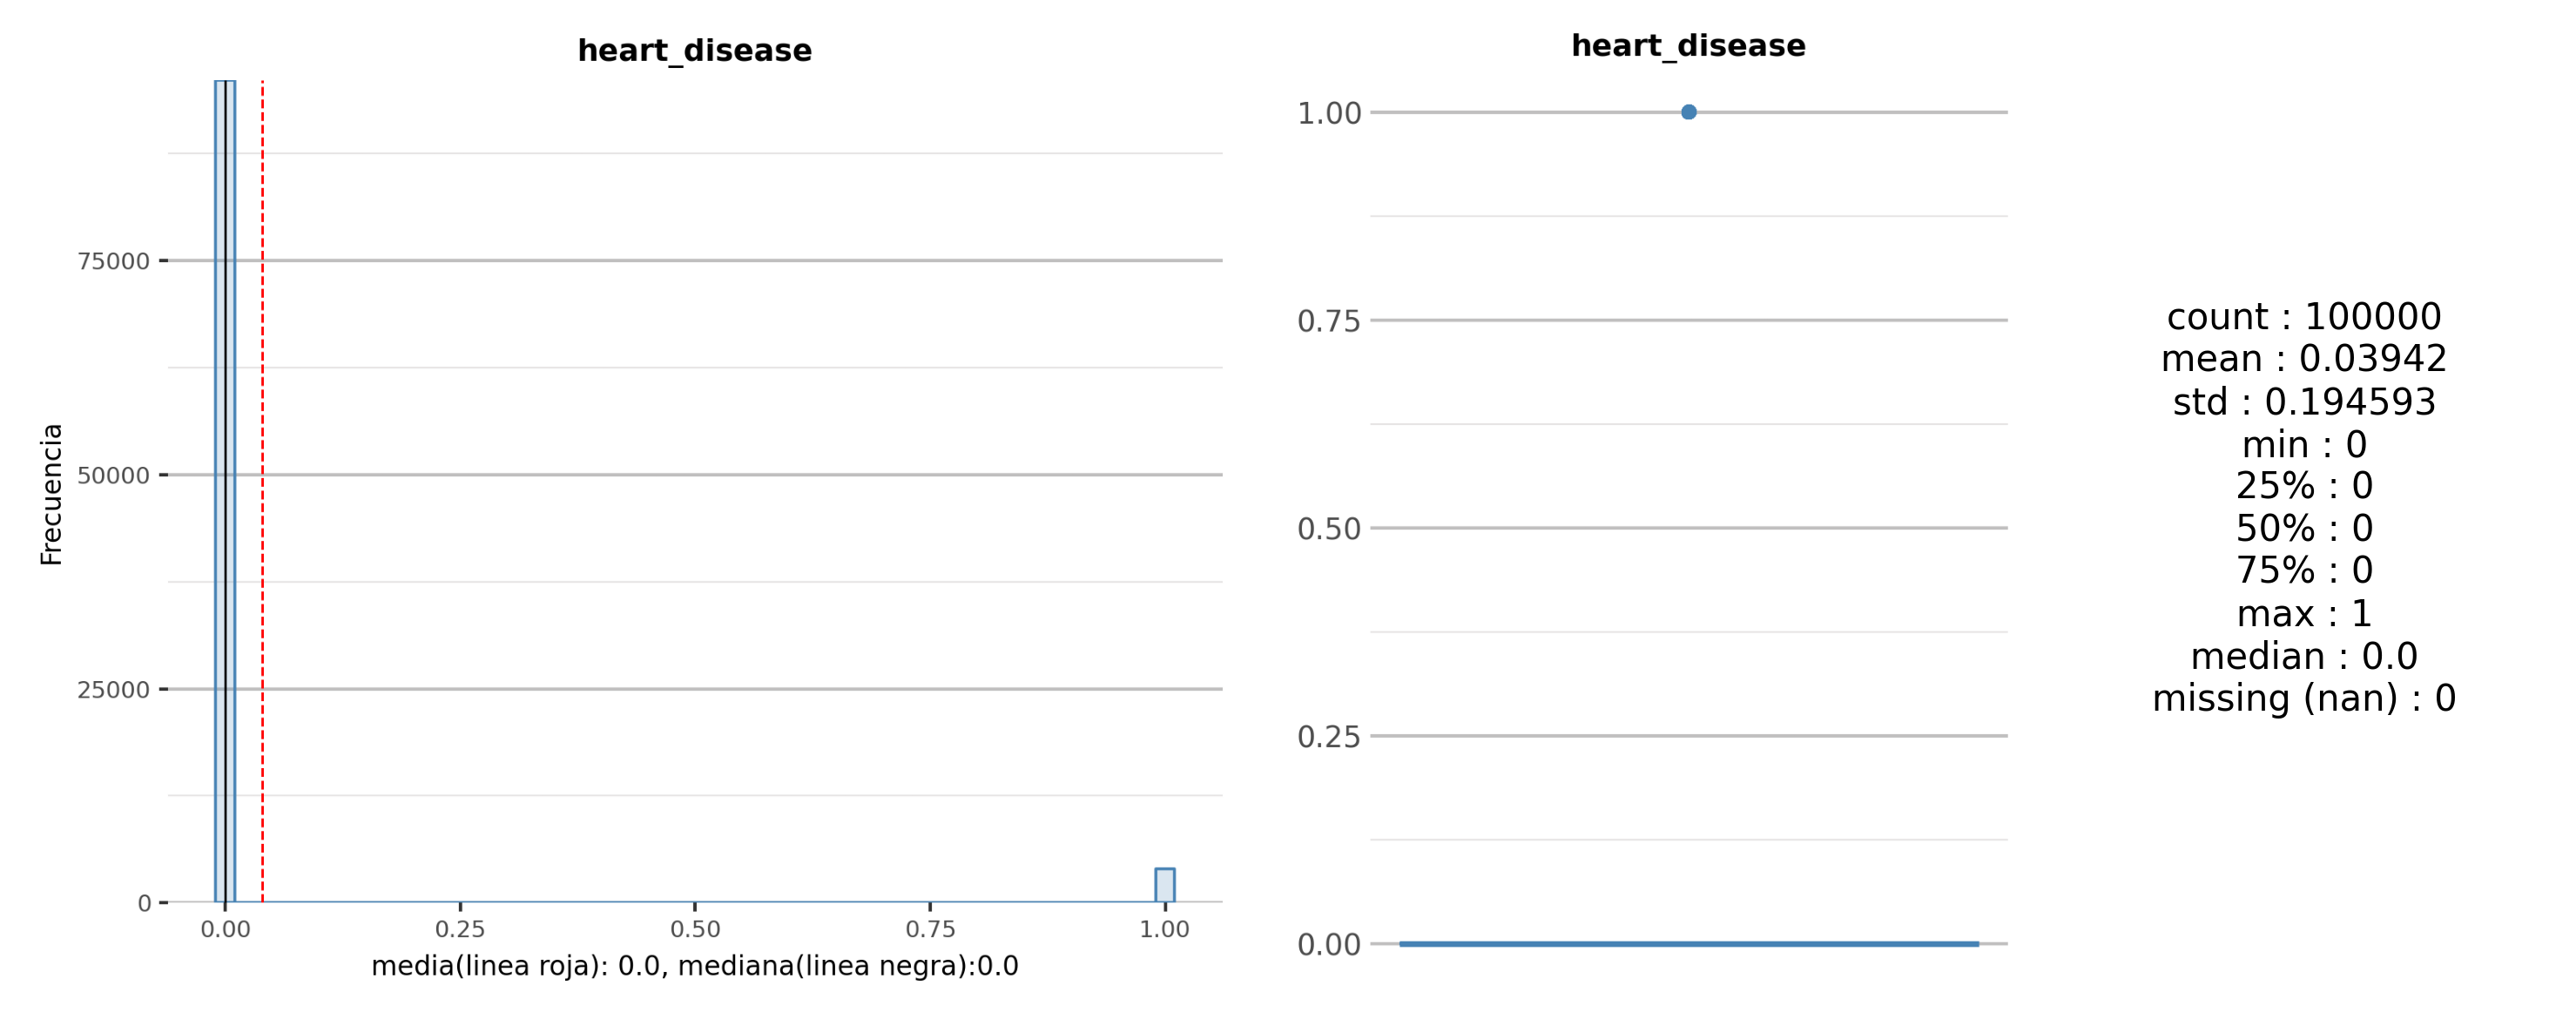

In [59]:
col = numeric_var[2]
histogram_plot = ut.histogram_plot(data,col,color_general,color_mean,color_median,fig_size_histogram)
box_plot = ut.box_plot(data,col,color_general,fig_size_box_plot)
desc_text = ut.desc_plot(data,col)
plot_var_cuantitative = ut.plot_var_cuantitative(histogram_plot,box_plot,desc_text,fig_size_histogram,fig_size_box_plot,fig_size_desc)
plt.tight_layout()
plt.show()

_heart_disease_ es numérica pero solo toma los valores de $(0,1)$,  o `False`/`True`, en consecuencia de ahora en adelante de tratara como una variable categórica.

### bmi

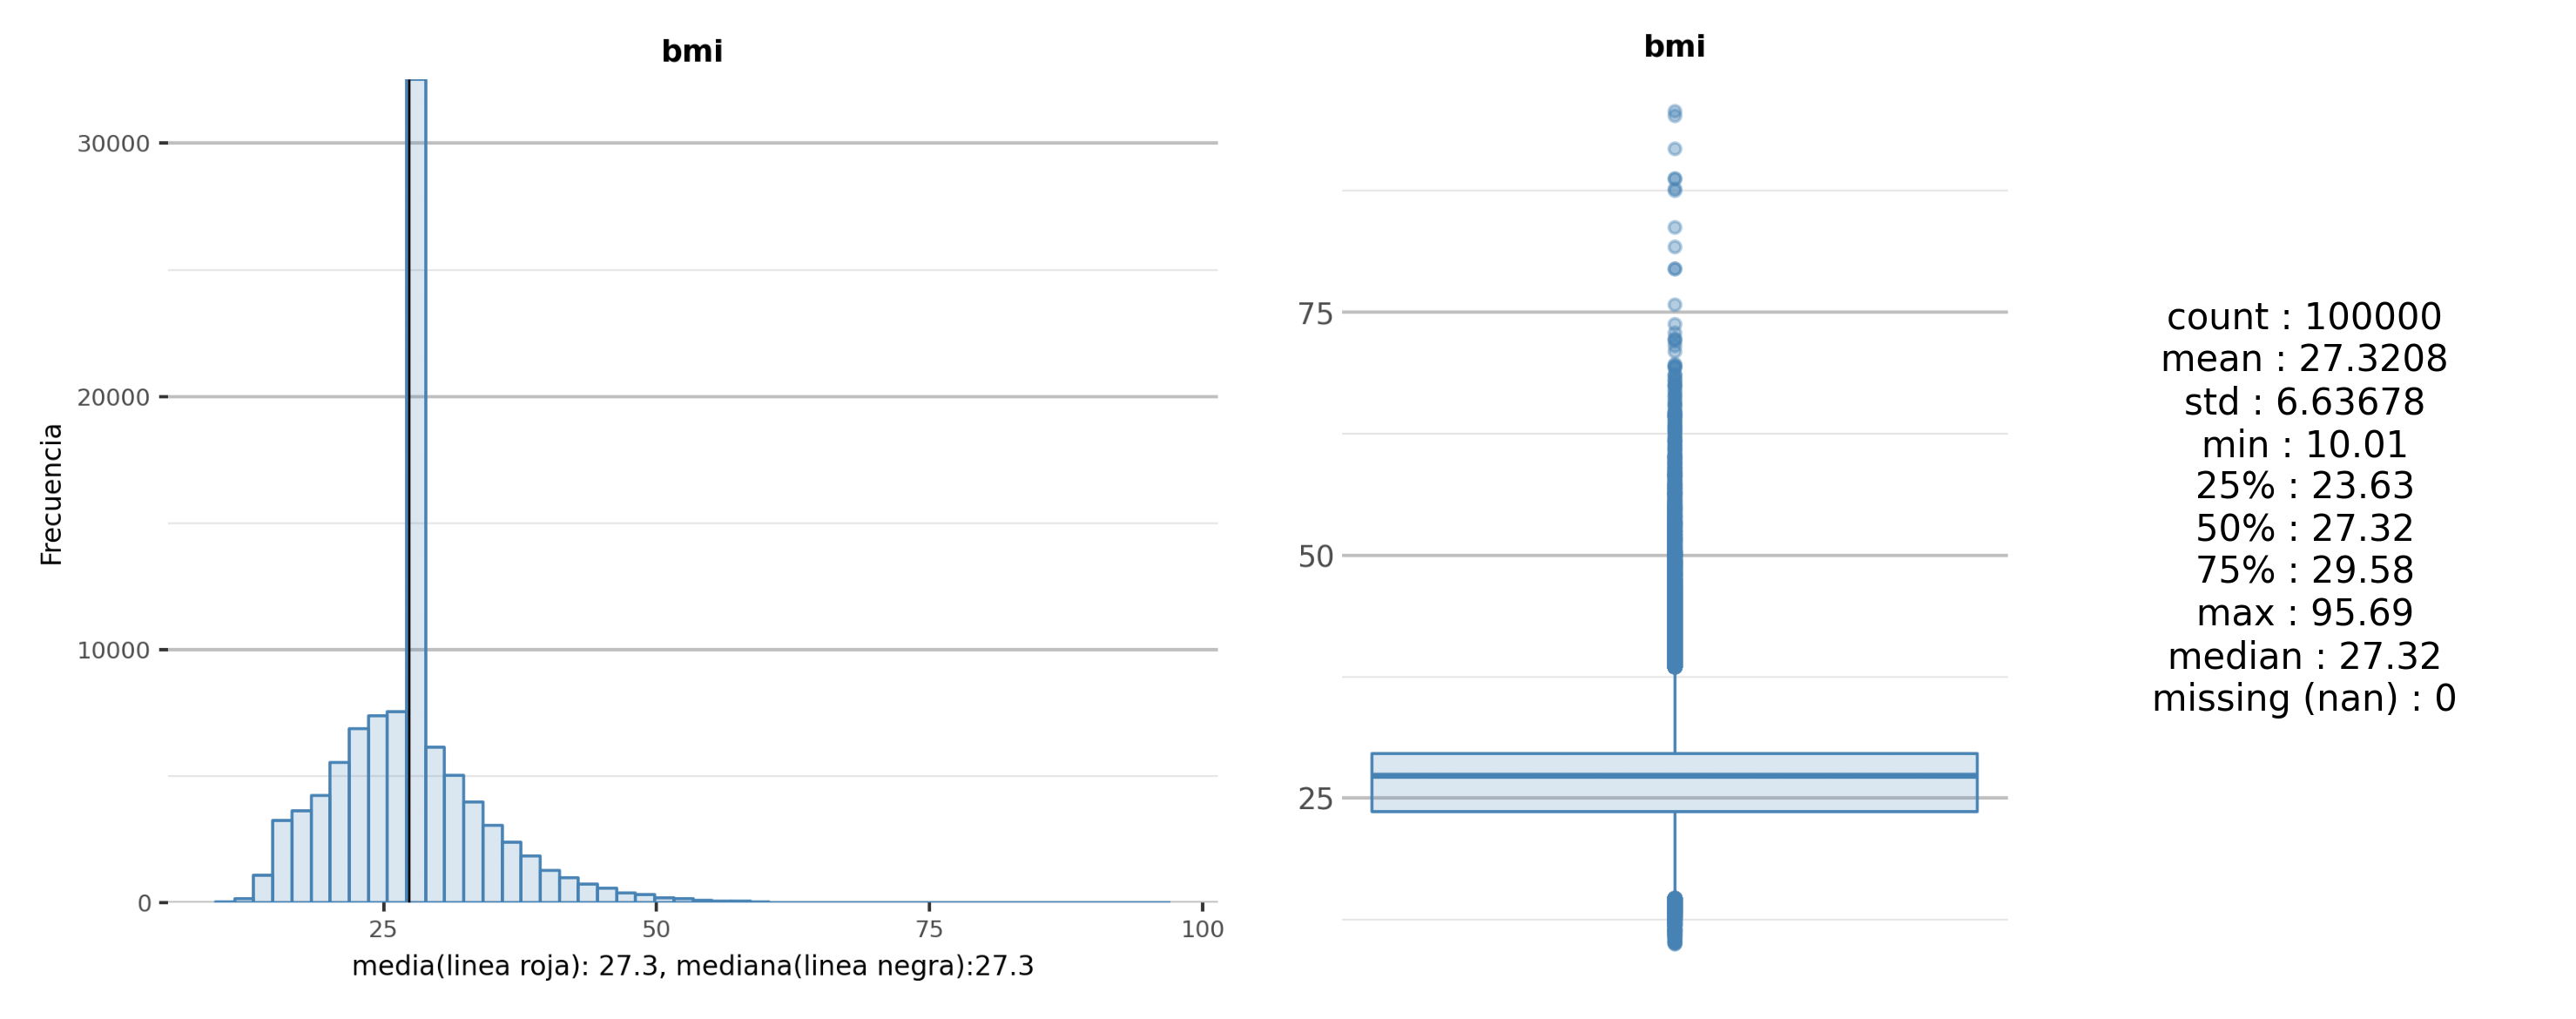

In [60]:
col = numeric_var[3]
histogram_plot = ut.histogram_plot(data,col,color_general,color_mean,color_median,fig_size_histogram)
box_plot = ut.box_plot(data,col,color_general,fig_size_box_plot)
desc_text = ut.desc_plot(data,col)
plot_var_cuantitative = ut.plot_var_cuantitative(histogram_plot,box_plot,desc_text,fig_size_histogram,fig_size_box_plot,fig_size_desc)
plt.tight_layout()
plt.show()

La variable sigue una distribución normal en su histograma,alrededor de 27.3 hay una explosión en el conteo, quizás porque es un valor típico de esta variable en la población general. Existen una serie de *outliers* tanto por encima de la distribución como por debajo.

BMI presenta una distribución concentrada en valores clínicamente plausibles, pero con una cola derecha pronunciada y outliers extremos, que deberán ser tratados en fases posteriores para evitar distorsiones en el análisis.

### HbA1c_level

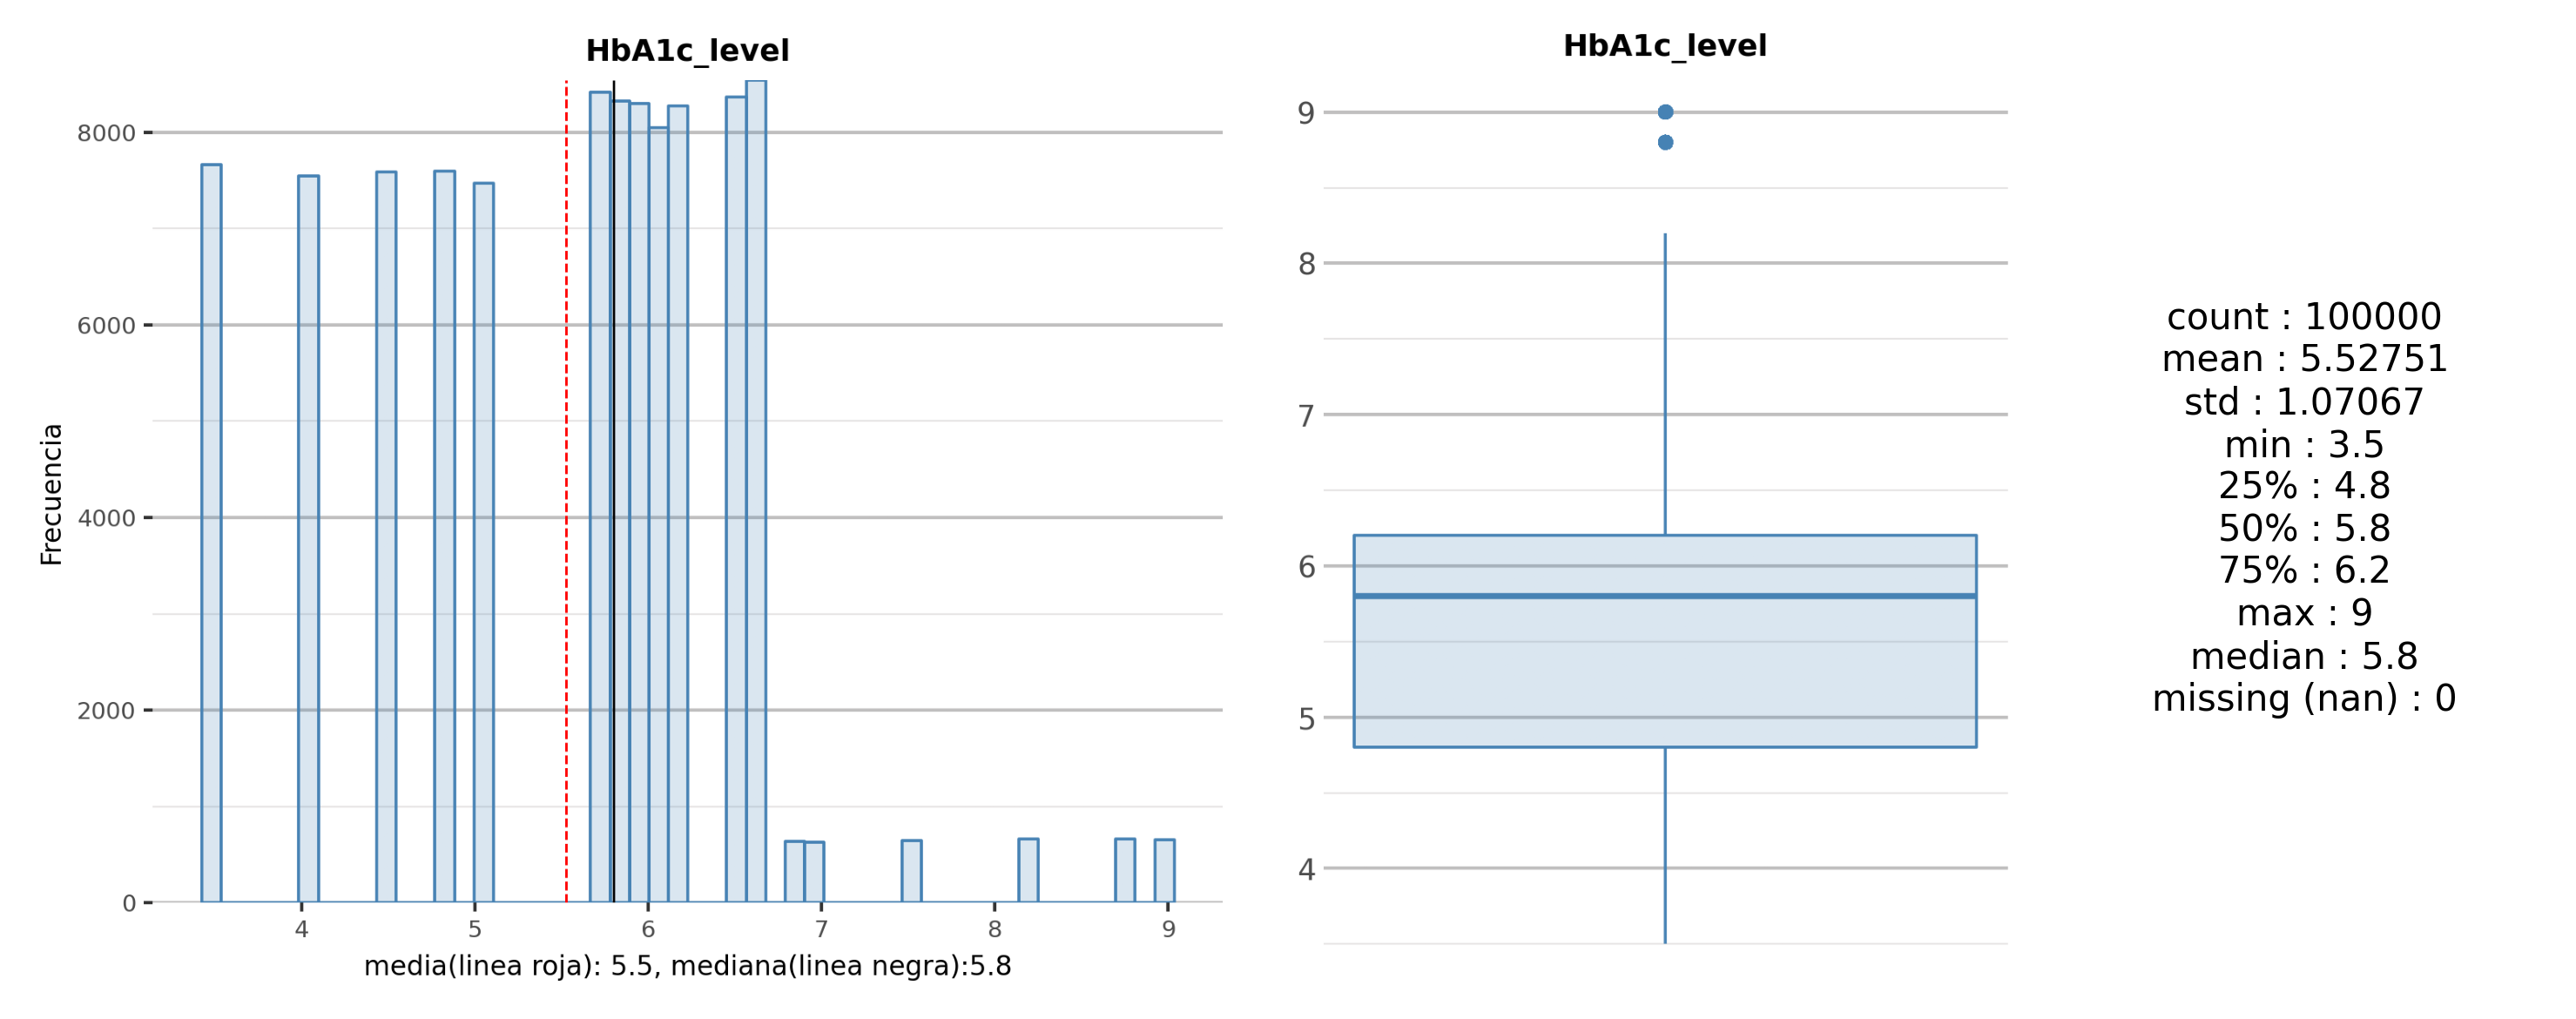

In [61]:
col = numeric_var[4]
histogram_plot = ut.histogram_plot(data,col,color_general,color_mean,color_median,fig_size_histogram)
box_plot = ut.box_plot(data,col,color_general,fig_size_box_plot)
desc_text = ut.desc_plot(data,col)
plot_var_cuantitative = ut.plot_var_cuantitative(histogram_plot,box_plot,desc_text,fig_size_histogram,fig_size_box_plot,fig_size_desc)
plt.tight_layout()
plt.show()

La distribución de esta variable no es continua, ya que solo toma ciertos valores puntuales.

- La variable presenta un rango 3.5–9.0, plenamente coherente con valores clínicos reales.
- La mediana (5.8) es superior a la media (≈5.53), indicando una ligera asimetría a la izquierda.
- La mayor concentración de observaciones se sitúa entre 4.8 y 6.2, rango compatible con población no diabética y prediabética.
- Existen valores altos (≥7) poco frecuentes, compatibles con perfiles diabéticos, sin considerarse outliers erróneos.
- La dispersión es moderada (std ≈1.07), lo que sugiere buena capacidad discriminativa.
- Como consecuencia de que solo toma valores puntuales, procederemos a discretizar la variable, utilizando arboles de decisión.

### blood_glucose_level

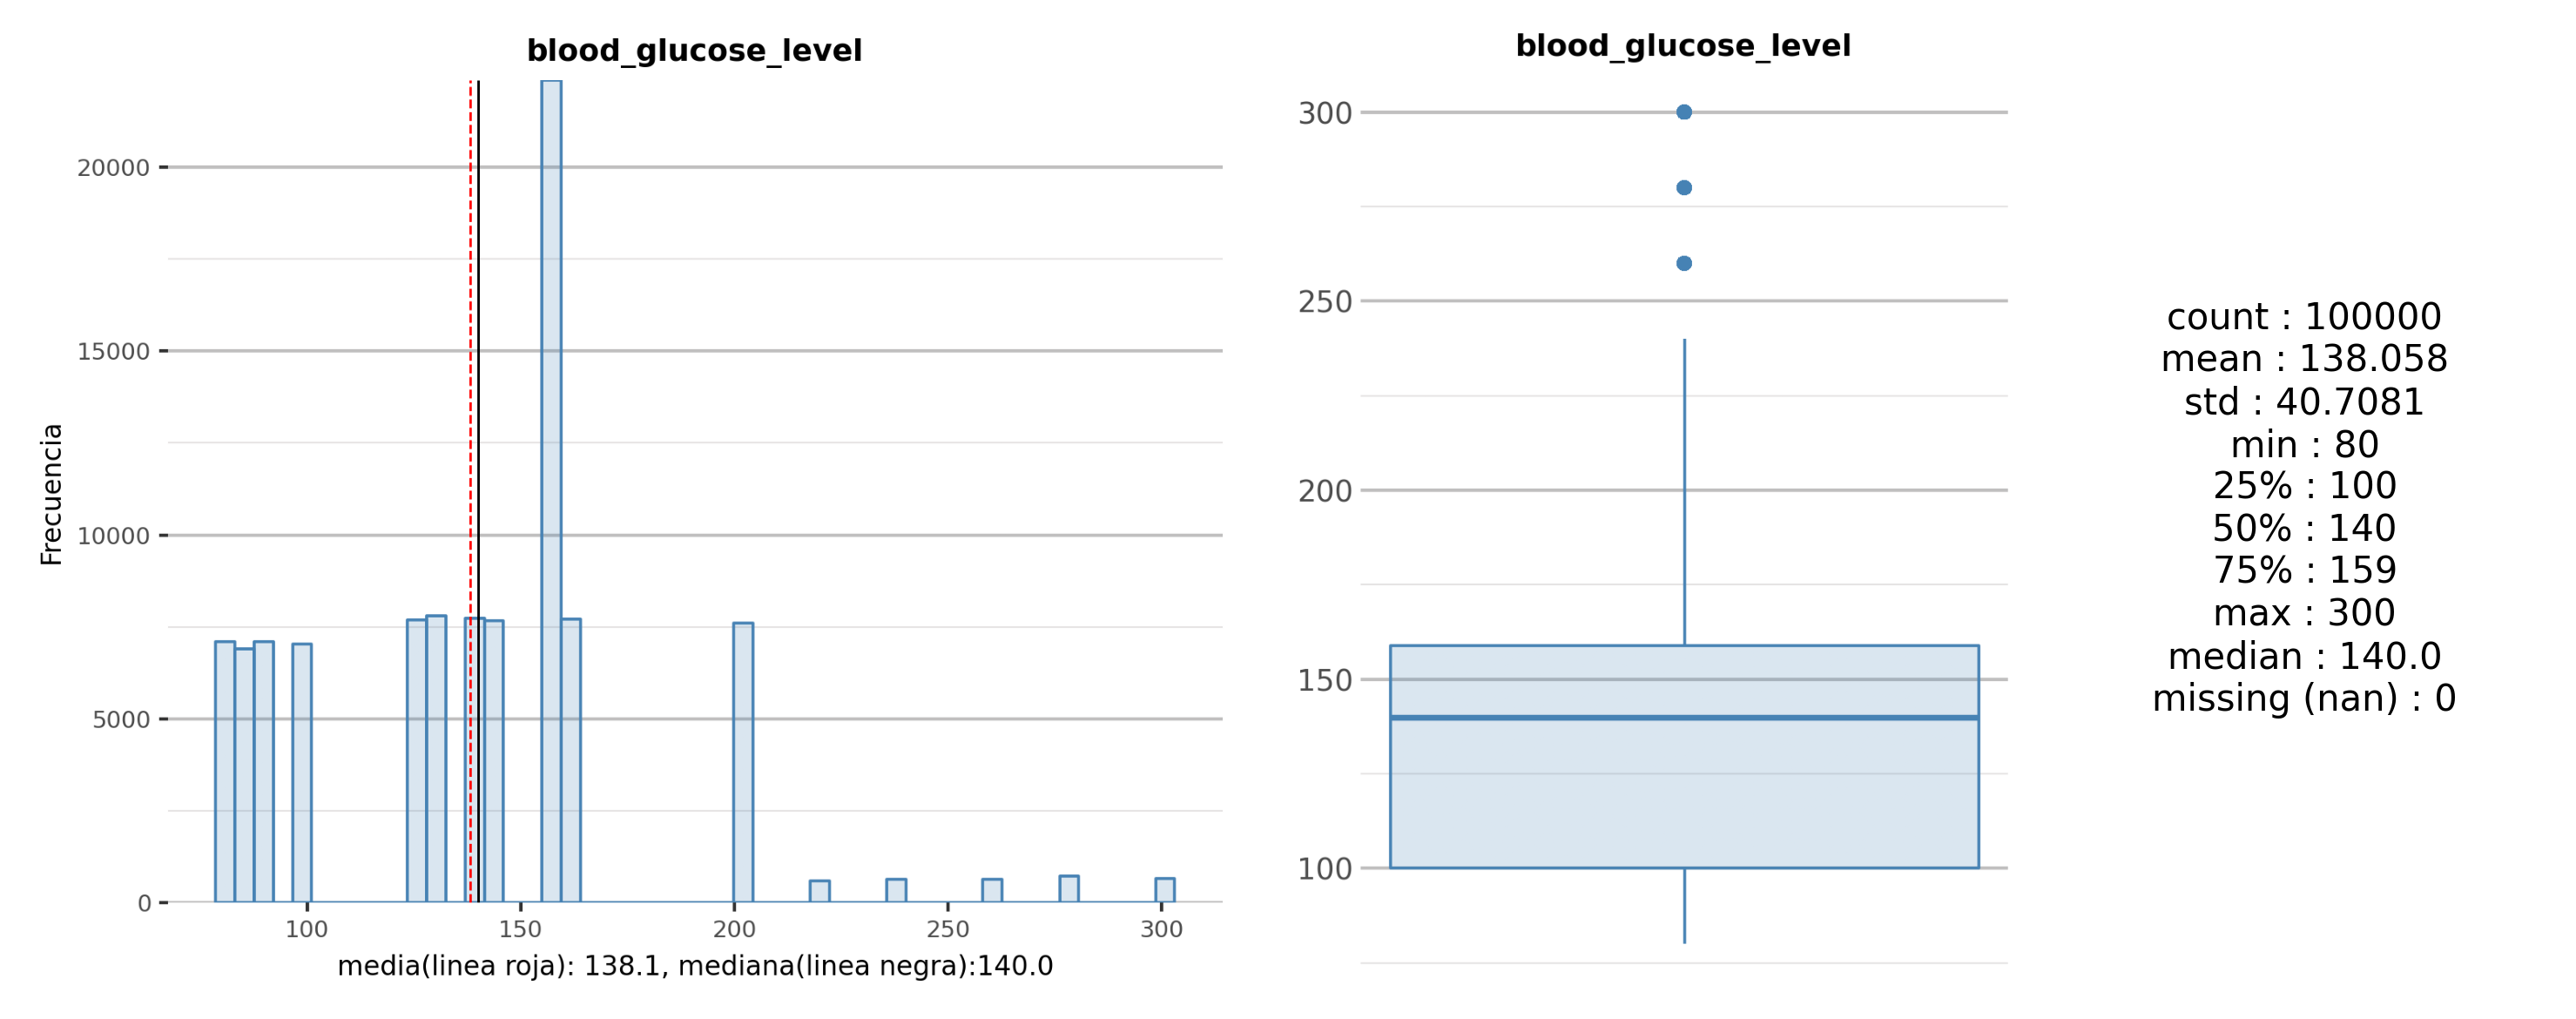

In [62]:
col = numeric_var[5]
histogram_plot = ut.histogram_plot(data,col,color_general,color_mean,color_median,fig_size_histogram)
box_plot = ut.box_plot(data,col,color_general,fig_size_box_plot)
desc_text = ut.desc_plot(data,col)
plot_var_cuantitative = ut.plot_var_cuantitative(histogram_plot,box_plot,desc_text,fig_size_histogram,fig_size_box_plot,fig_size_desc)
plt.tight_layout()
plt.show()

La distribución de esta variable no es continua, ya que solo toma ciertos valores puntuales.

- La variable presenta un rango 80–300, compatible con valores clínicos reales en mediciones puntuales de glucosa.
- La mediana (140) es ligeramente superior a la media (≈138), indicando ligera asimetría a la izquierda.
- La mayor concentración de observaciones se sitúa entre 100 y 160, rango típico de población general y prediabética.
- Existen valores altos (≥200) poco frecuentes, coherentes con episodios hiperglucémicos y perfiles diabéticos.
- La dispersión es elevada (std ≈40.9), lo que sugiere heterogeneidad metabólica en la muestra.
- No se detectan valores imposibles; los extremos observados no se consideran errores, sino casos clínicamente plausibles.

Decisiones posterior al análisis univariante de variables continuas.
- hypertension y heart_disease, serán tratadas de ahora en adelante como variables categóricas binarias (0,1).


In [63]:
categoric_var.append('hypertension')
numeric_var.remove('hypertension')
categoric_var.append('heart_disease')
numeric_var.remove('heart_disease')

### 2.2 Análisis univariante, variables categóricas.
Definimos colores y tamaños de los gráficos

In [64]:
color_general = 'steelblue'
fig_size = (10,4)

### gender

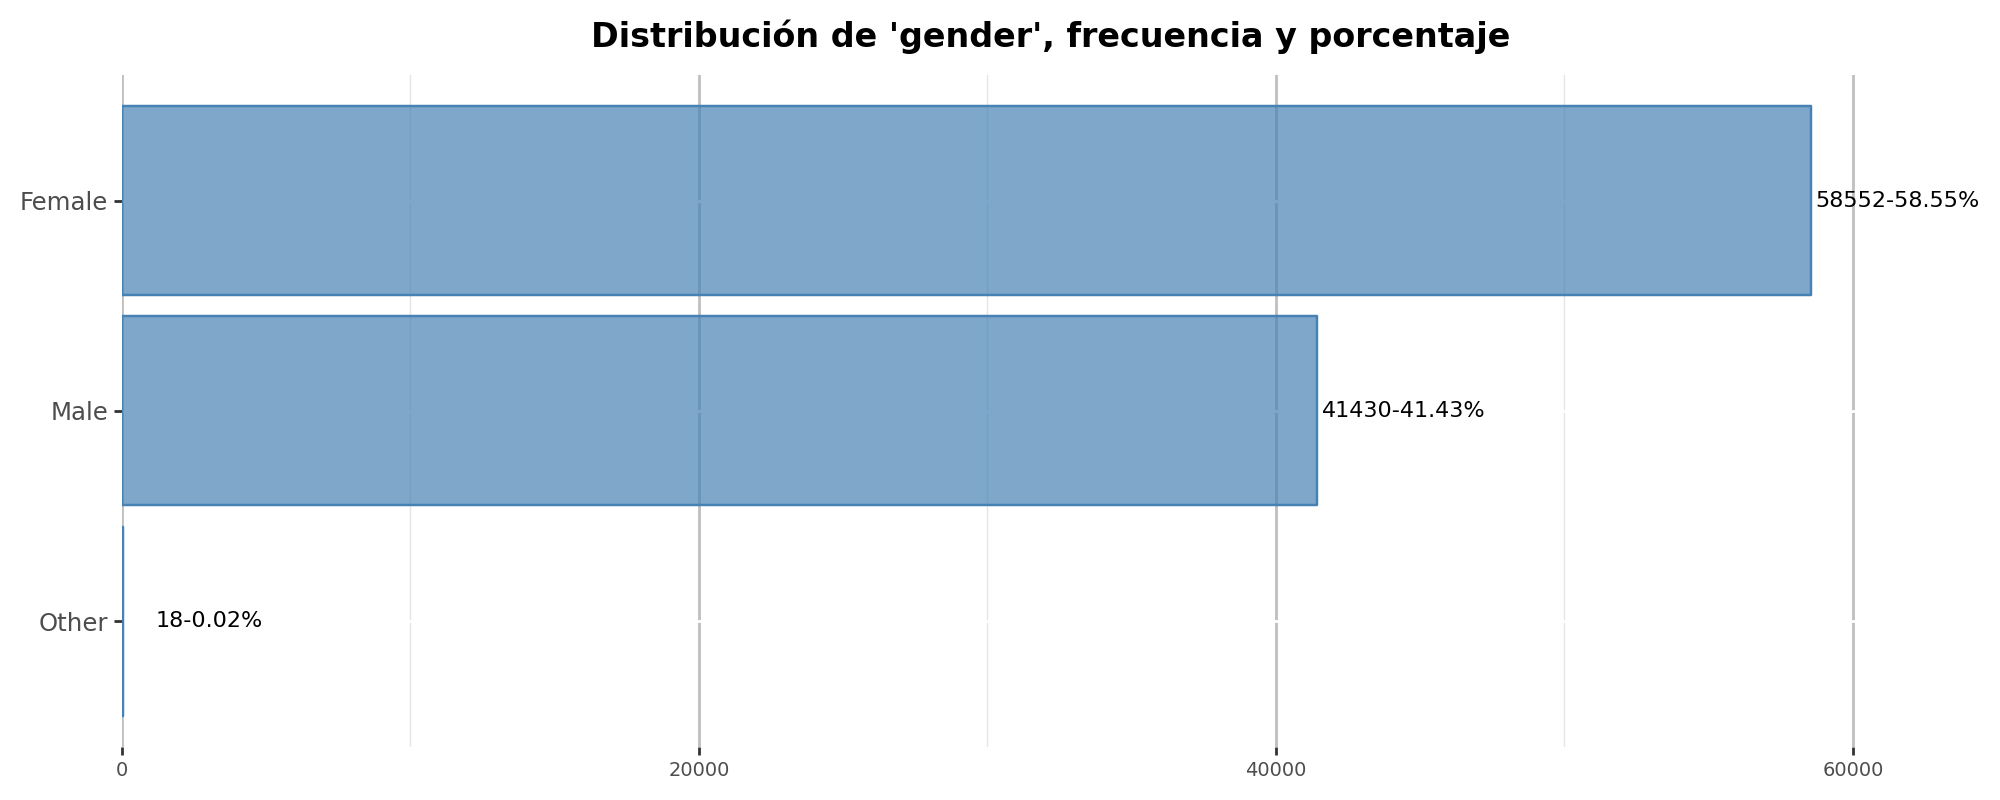

In [65]:
col = categoric_var[0]
bar_plot = ut.bar_plot(data, col,color_general,fig_size,3000)
bar_plot.show()

Observamos la presencia de un género `Other` cuyas observaciones son irrisorias respecto a los géneros masculino y femenino y por esta razón eliminaremos estas observaciones.

### smoking_history

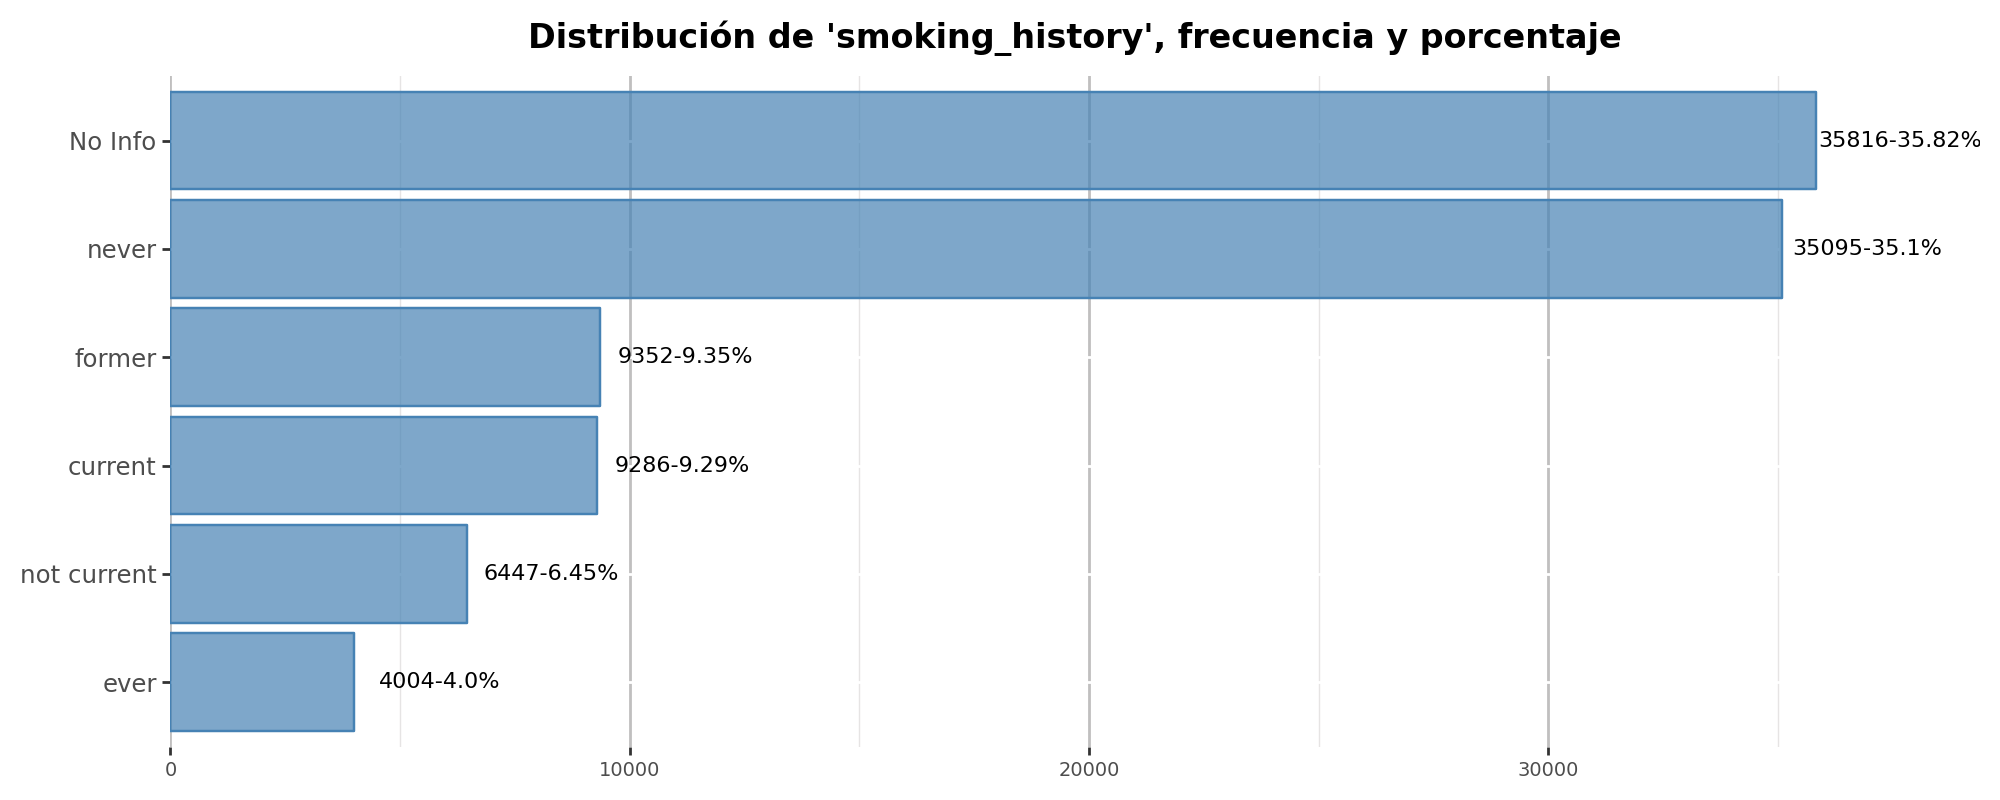

In [66]:
col = categoric_var[1]
bar_plot = ut.bar_plot(data, col,color_general,fig_size,1850)
bar_plot.show()

Podemos ver que hay una gran cantidad de falta de información. Un tercio de la información de esta variable es desconocida (No info). En cuanto a nuestras variables que son similares, vemos que hay una cierta homogeneidad en el conteo, dentro del mismo orden de magnitud. Sin embargo, sí que vemos claras diferencias entre aquellos que declaran ser fumadores ($\sim 9000$) y los que no han fumado nunca ($\sim 35,000$).

### diabetes (variable objetivo)

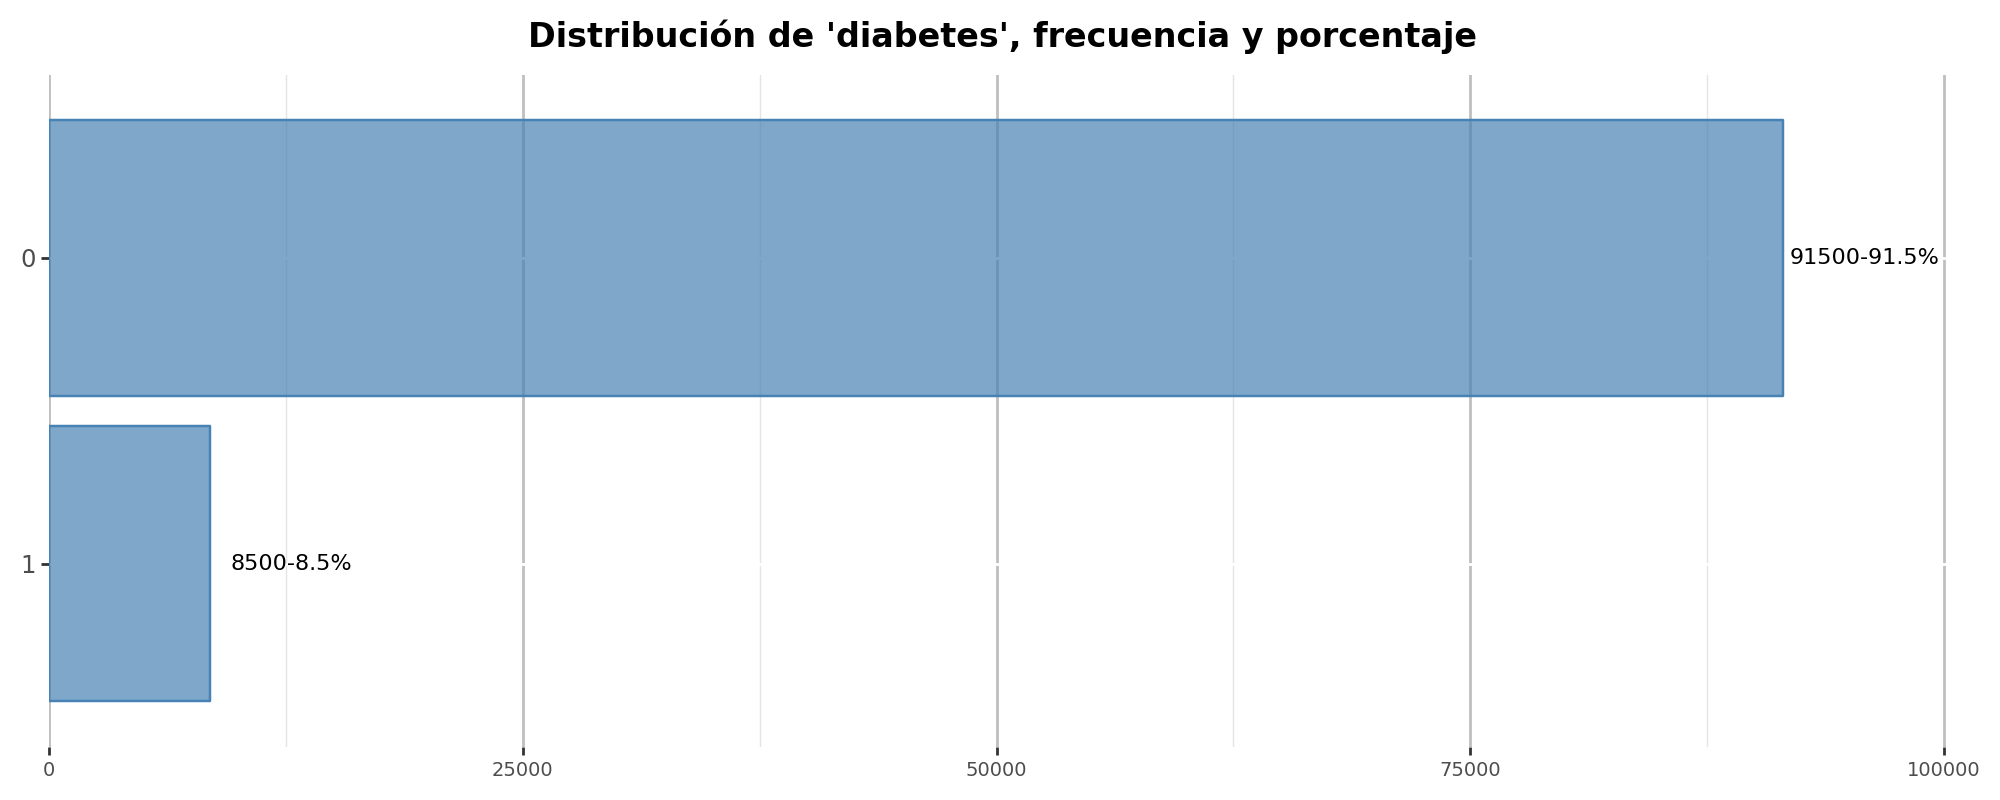

In [67]:
col = categoric_var[2]
bar_plot = ut.bar_plot(data, col,color_general,fig_size,4300)
bar_plot.show()

- La prevalencia de diabetes en el dataset es baja (~8.5%).
- La variable objetivo está claramente **desbalanceada**, con predominio de no diabéticos.
- La distribución es coherente con un escenario de cribado poblacional.

### hypertension

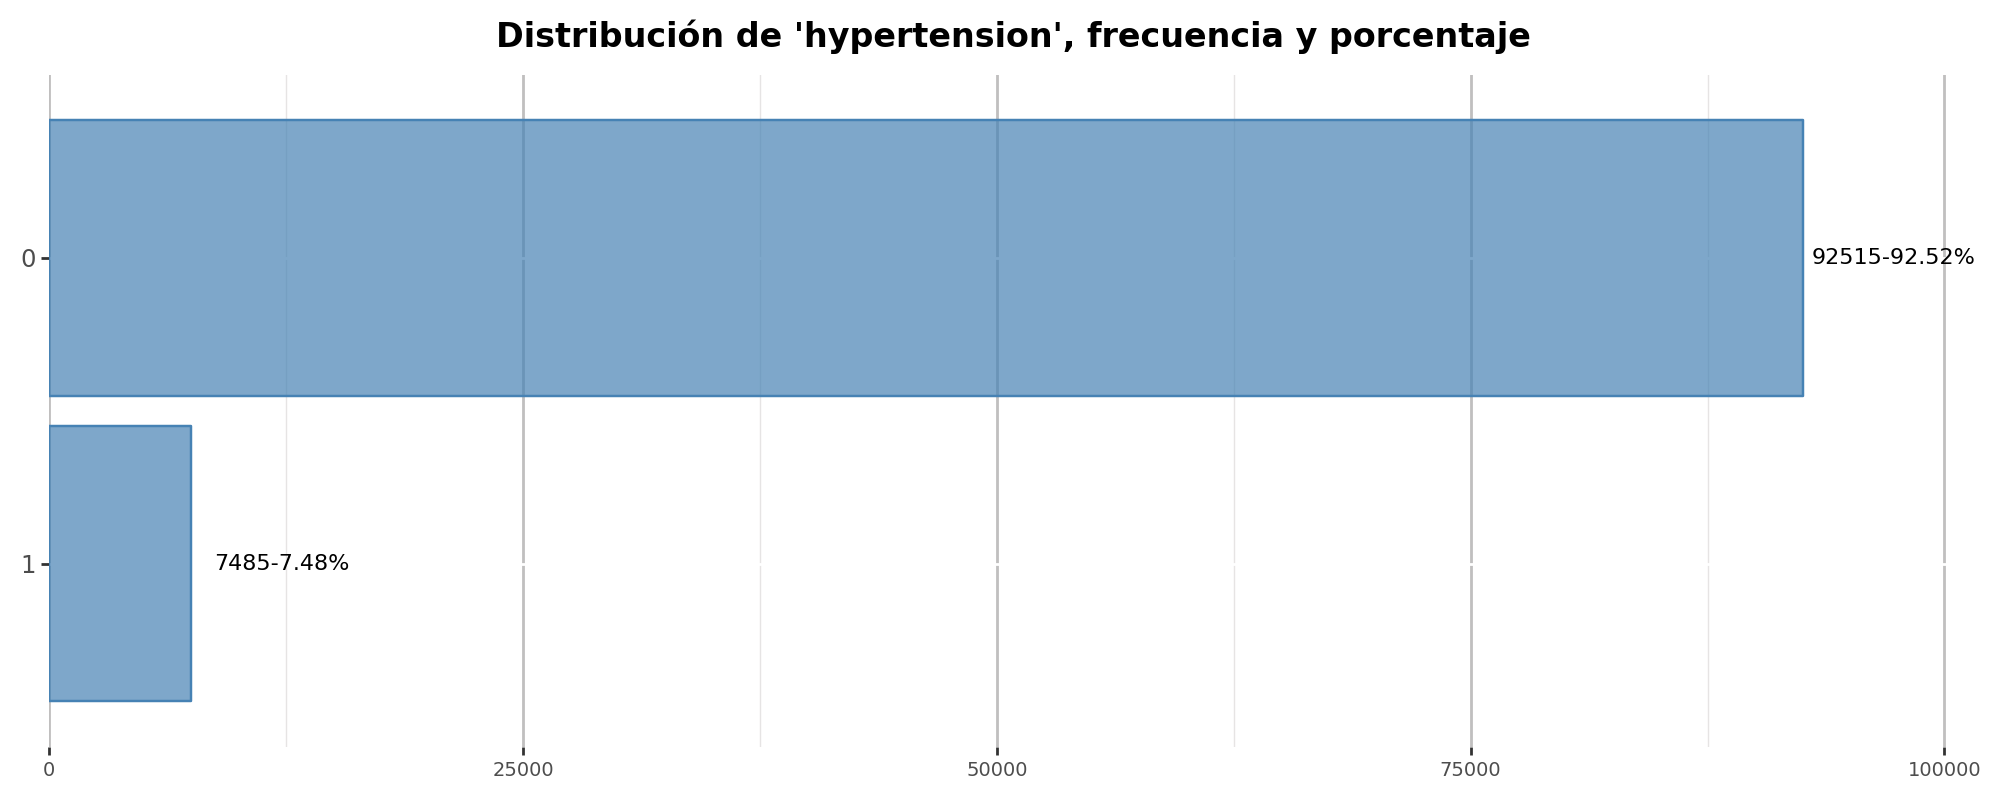

In [68]:
col = categoric_var[3]
bar_plot = ut.bar_plot(data, col,color_general,fig_size,4800)
bar_plot.show()

- La hipertensión presenta una prevalencia baja (~7.5%) en el dataset.
- La variable está **desbalanceada**, con clara mayoría de individuos sin hipertensión.
- La frecuencia observada es clínicamente plausible para una población general.
- La baja prevalencia sugiere que la hipertensión puede actuar como **factor de riesgo**, no como característica dominante.
- La variable es informativa, pero su efecto deberá evaluarse en combinación con otras variables en el análisis bi-variante.

### heart_disease

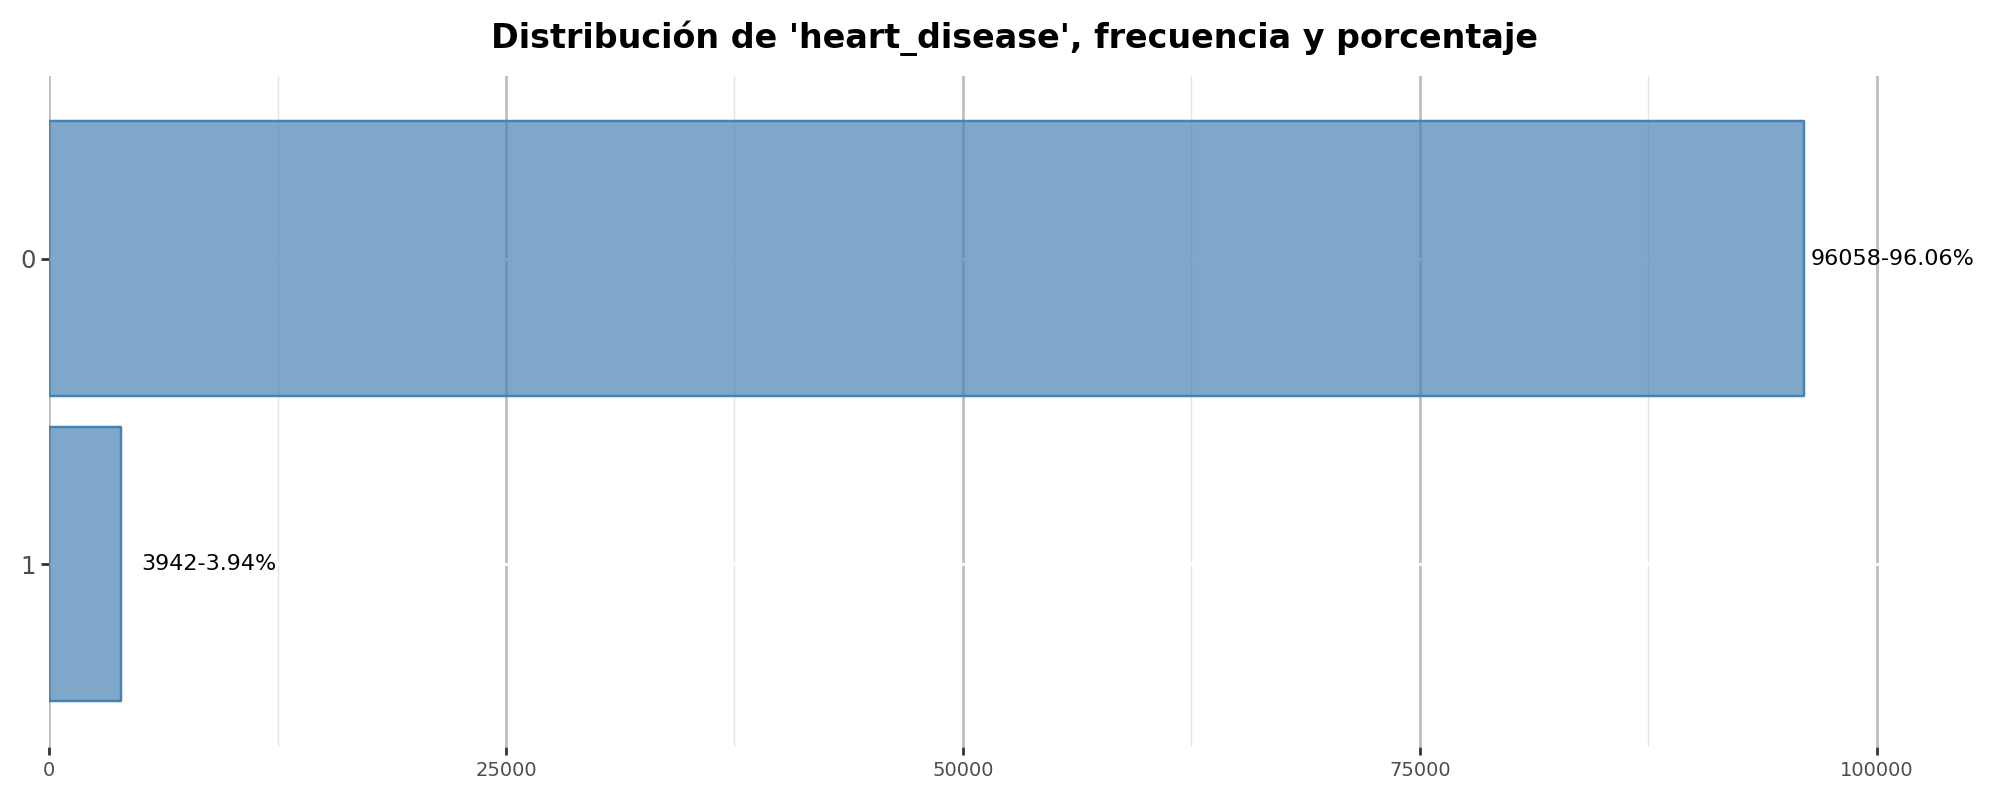

In [69]:
col = categoric_var[4]
bar_plot = ut.bar_plot(data, col,color_general,fig_size,4800)
bar_plot.show()

- La enfermedad cardíaca presenta una **prevalencia muy baja** (~3.9%) en el dataset.
- La variable está fuertemente **desbalanceada**, con una clara mayoría de individuos sin patología cardíaca.
- La frecuencia observada es coherente clínicamente para una población general.
- Al tratarse de una condición poco frecuente, su impacto aislado puede ser limitado, pero **puede aportar señal relevante en combinación con otras variables**.
- Será importante vigilar posibles celdas con baja frecuencia en análisis bivariantes y tests estadísticos.


### Acciones a realizar posterior al análisis univariante.

En consecuencia de lo observado, se toman las siguientes decisiones
- Eliminar la clase **Other** en la variable de gender, ya que las observaciones son muy pocas 0.02%.
- Se discretizaran las variables HbA1c_level y blood_glucose_level utilizando optimal binning, ya que al no ser variables continuas y dada la cantidad de observaciones y el modelo buscar clasificar pacientes con diabetes o sin diabetes.

In [ ]:
data = data[data['gender']!='Other'].copy()

#### Discretización blood_glucose_level

In [143]:
col = 'blood_glucose_level'
optbin = OptimalBinning(name=col, dtype='numerical', max_n_bins=4)
optbin.fit(data[col], data['diabetes'])

optbin_df = optbin.binning_table.build()
optbin_df['IV_%'] = (optbin_df['IV']*100/optbin_df.loc['Totals','IV']).round(2)
optbin_df

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,IV_%
0,"(-inf, 128.00)",35840,0.358465,35204,636,0.017746,1.63764,0.507661,0.057199,41.63
1,"[128.00, 159.50)",45558,0.455662,42314,3244,0.071206,0.192235,0.015550,0.001941,1.28
2,"[159.50, 180.00)",7708,0.077094,7012,696,0.090296,-0.066047,0.000346,0.000043,0.03
3,"[180.00, inf)",10876,0.108780,6952,3924,0.360794,-1.804158,0.695781,0.076815,57.06
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000,0.00
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000,0.00
Totals,,99982,1.000000,91482,8500,0.085015,,1.219338,0.135998,100.00


Creamos una nueva columna con los valores obtenidos, y la agregamos a las variables categóricas.

In [133]:
data['blood_glucose_level_binned'] = optbin.transform(data['blood_glucose_level'], metric='bins')
categoric_var.append('blood_glucose_level_binned')

#### Discretización HbA1c_level

In [150]:
col = 'HbA1c_level'
optbin = OptimalBinning(name=col, dtype='numerical', max_n_bins=5)
optbin.fit(data[col], data['diabetes'])

optbin_df = optbin.binning_table.build()
optbin_df['IV_%'] = (optbin_df['IV']*100/optbin_df.loc['Totals','IV']).round(2)
optbin_df

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,IV_%
0,"(-inf, 5.75)",46262,0.462703,45558,704,0.015218,1.793887,0.744779,0.082331,47.15
1,"[5.75, 6.55)",41288,0.412954,38070,3218,0.077940,0.09459,0.003553,0.000444,0.22
2,"[6.55, inf)",12432,0.124342,7854,4578,0.368243,-1.836315,0.831365,0.091409,52.63
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000,0.00
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000,0.00
Totals,,99982,1.000000,91482,8500,0.085015,,1.579696,0.174184,100.00


Creamos una nueva columna con los valores obtenidos, y la agregamos a las variables categóricas.

In [151]:
data['HbA1c_level_binned'] = optbin.transform(data['HbA1c_level'], metric='bins')
categoric_var.append('HbA1c_level_binned')

### 2.3 Análisis bi-variantes, variables numéricas.

In [95]:
colors_per_group = {'0':'seagreen','1':'red'}

### age

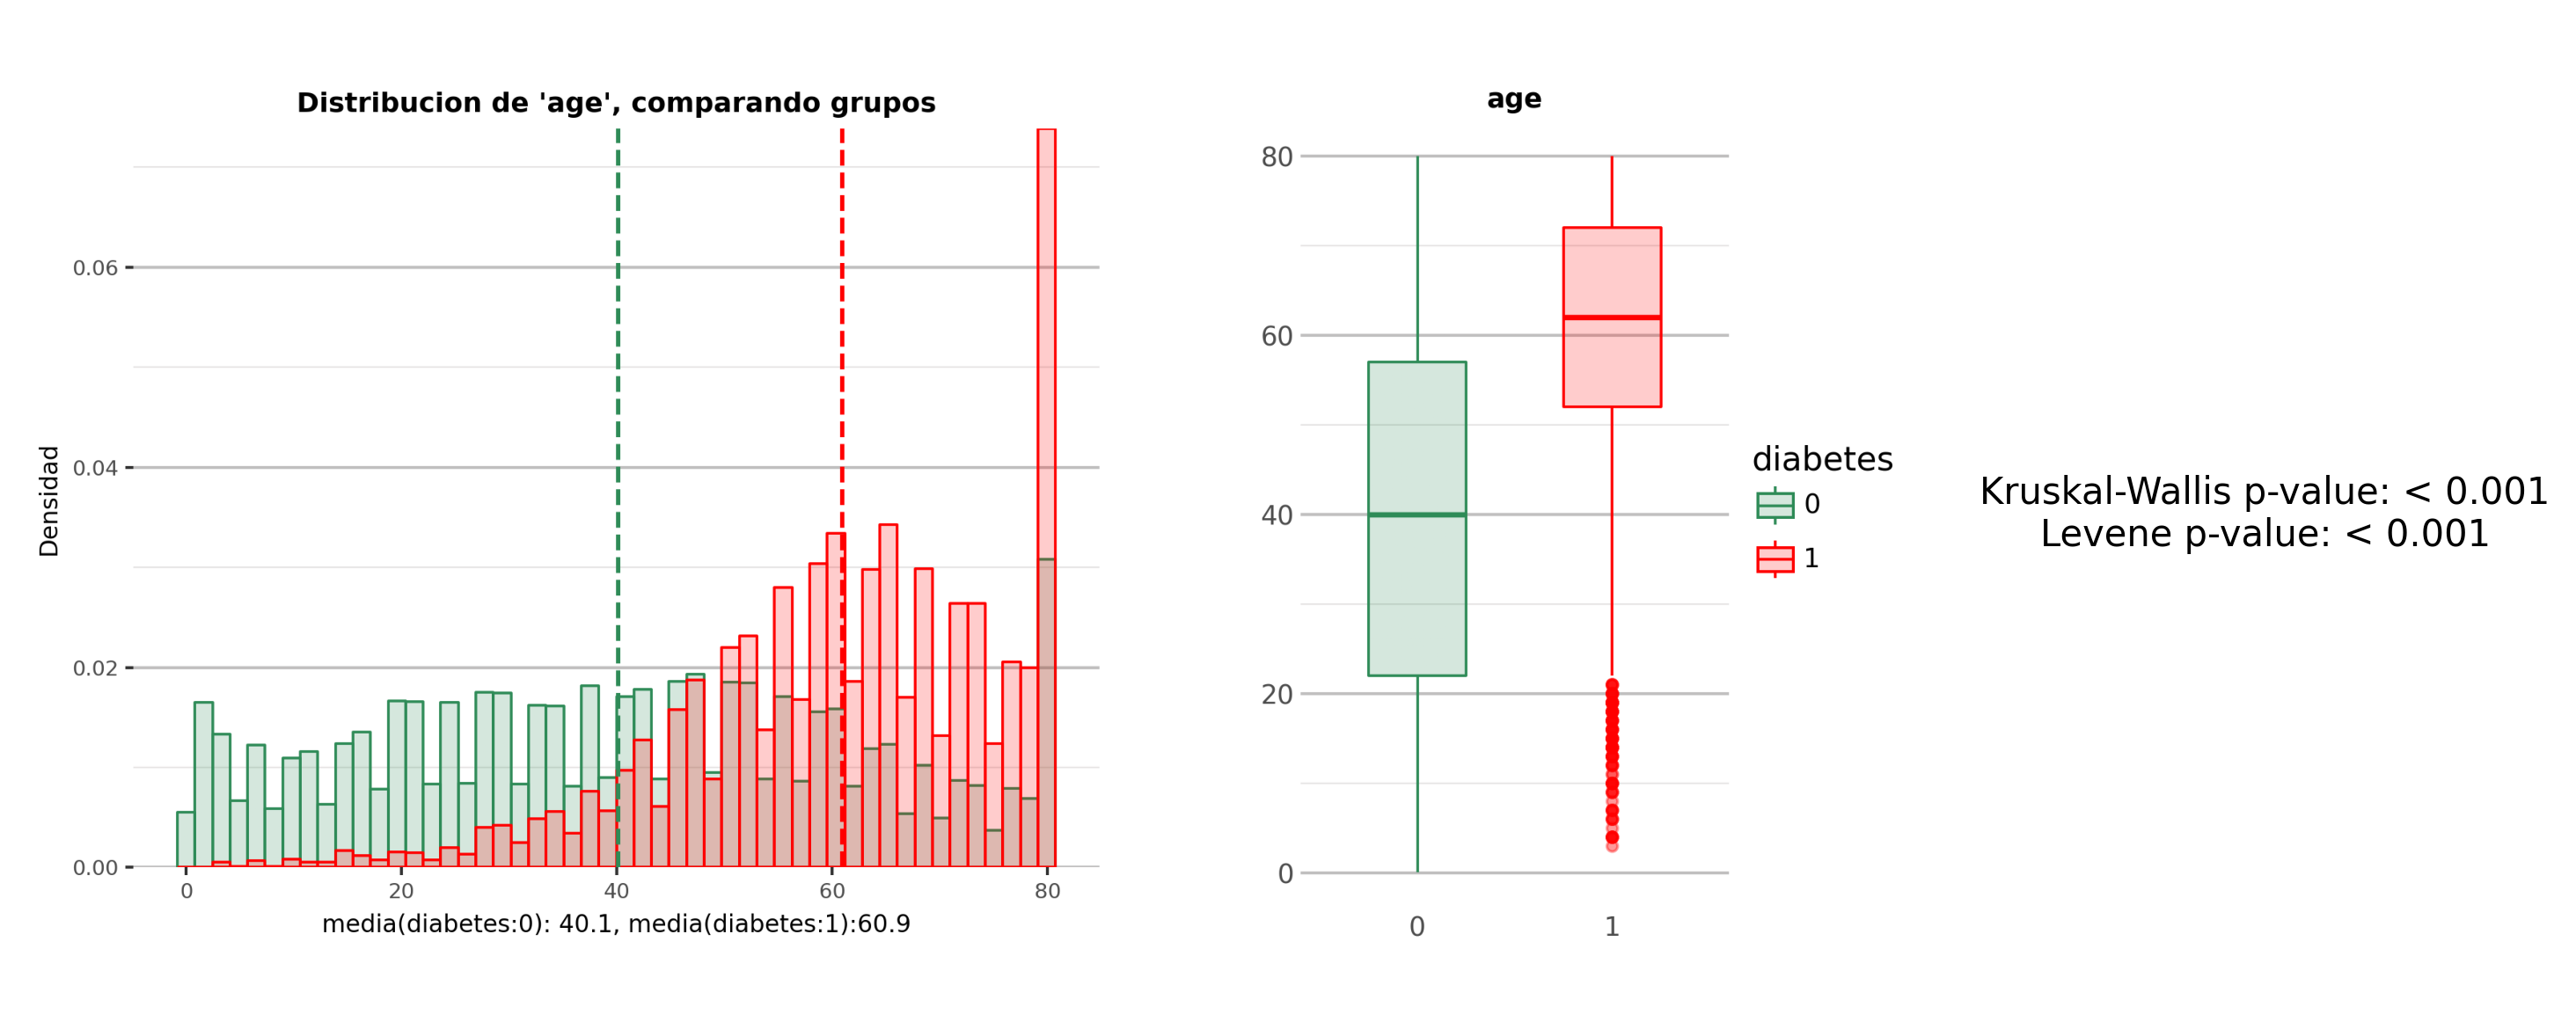

In [96]:
col=numeric_var[0]
hist_per_target_plot = ut.hist_per_target_plot(data,col,'diabetes',colors_per_group,(5,4))
box_per_target_plot = ut.box_per_target_plot(data,col,'diabetes',colors_per_group,(3,4))
desc_text_per_target = ut.desc_text_per_target(data,'age','diabetes')
plot_var_cuantitative =  ut.plot_var_cuantitative(hist_per_target_plot,box_per_target_plot,desc_text_per_target,fig_size_histogram,fig_size_box_plot,fig_size_desc)
plt.tight_layout()
plt.show()

### bmi

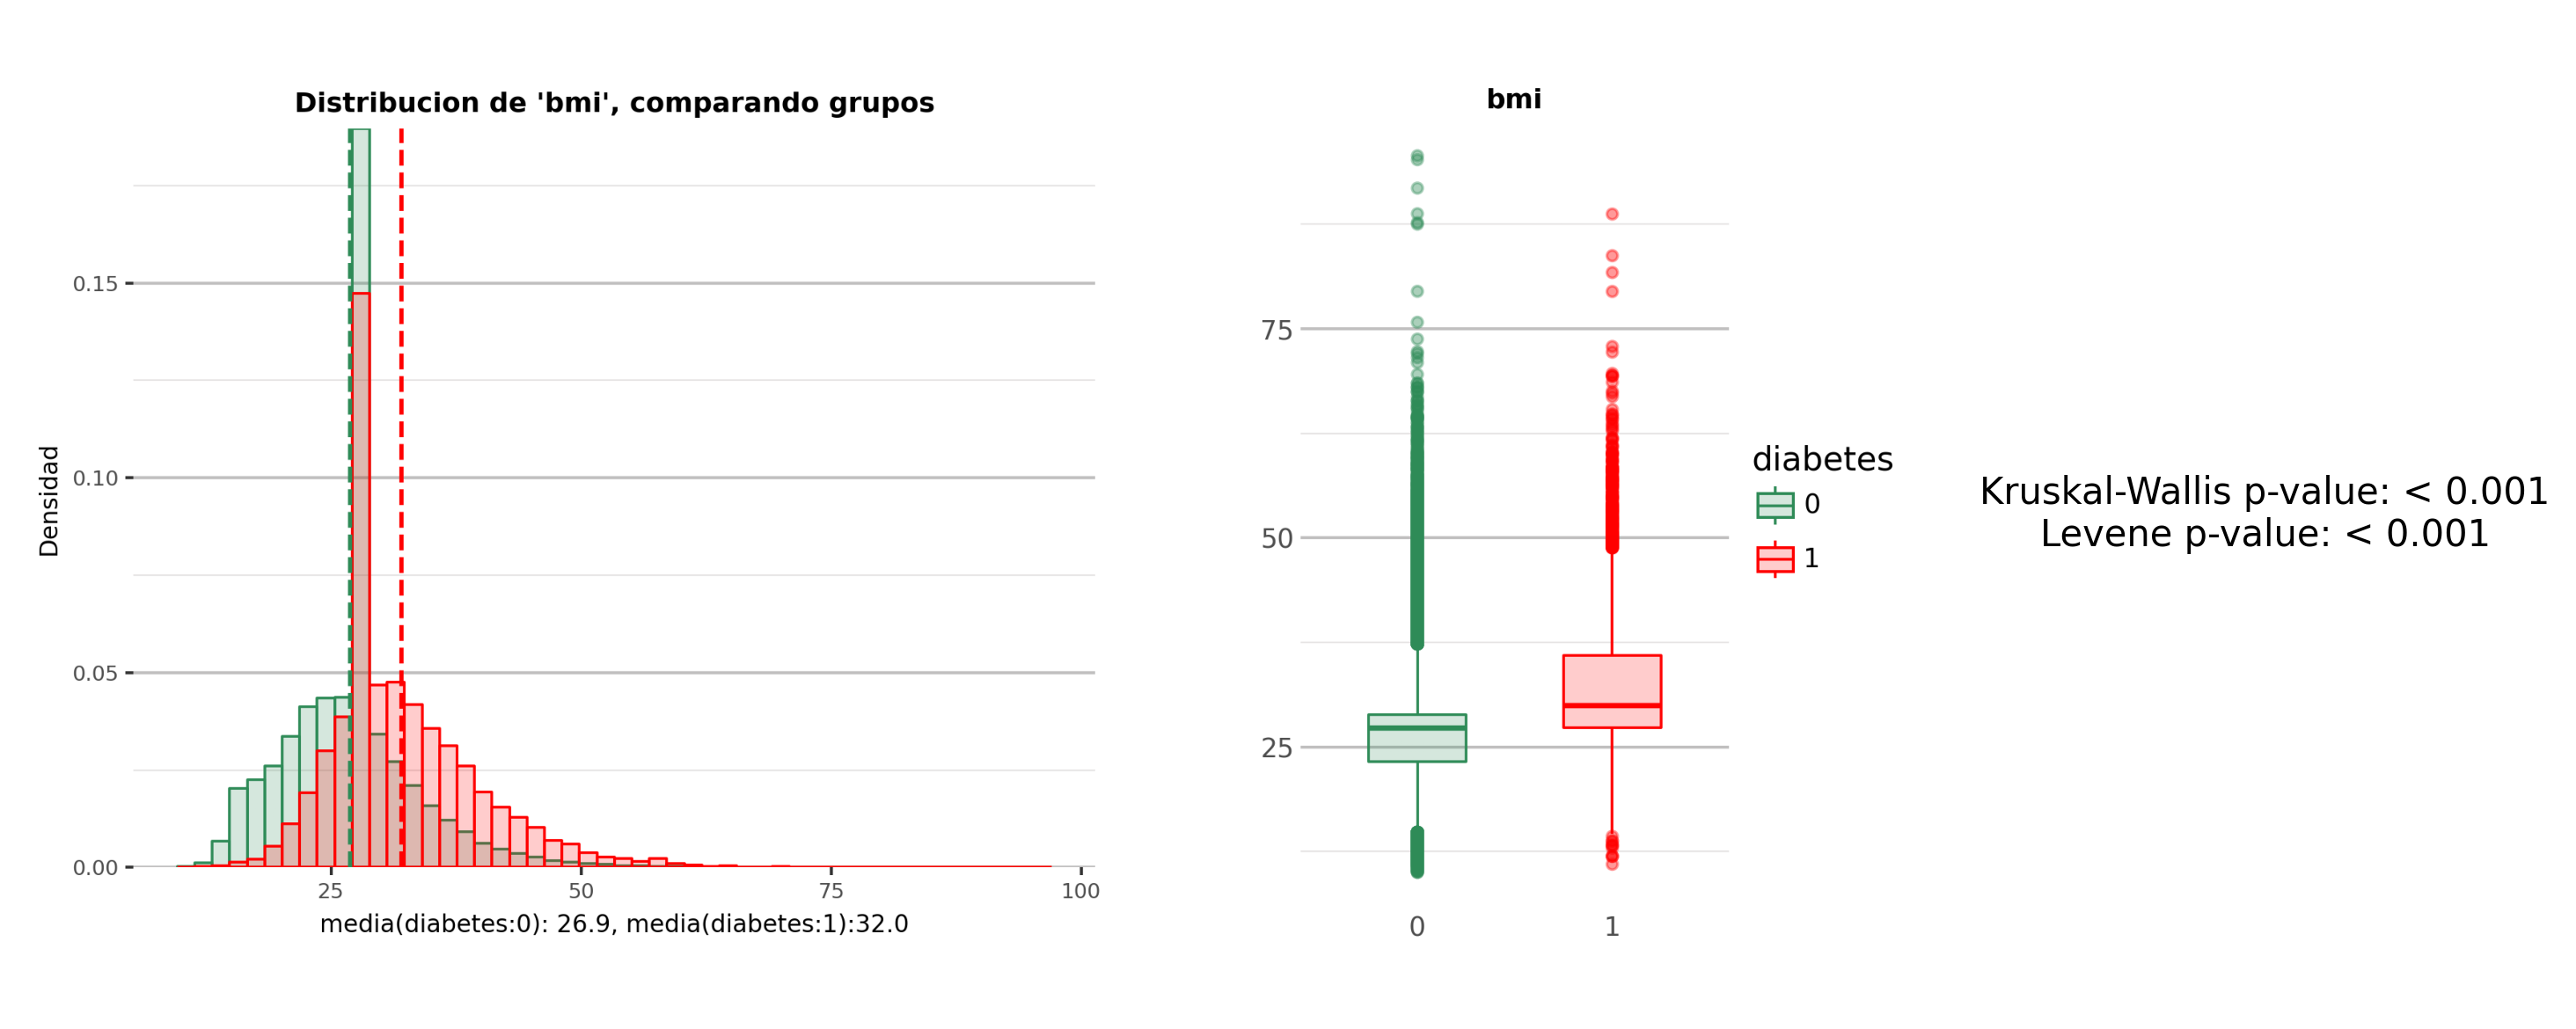

In [97]:
col=numeric_var[1]
hist_per_target_plot = ut.hist_per_target_plot(data,col,'diabetes',colors_per_group,(5,4))
box_per_target_plot = ut.box_per_target_plot(data,col,'diabetes',colors_per_group,(3,4))
desc_text_per_target = ut.desc_text_per_target(data,col,'diabetes')
plot_var_cuantitative =  ut.plot_var_cuantitative(hist_per_target_plot,box_per_target_plot,desc_text_per_target,fig_size_histogram,fig_size_box_plot,fig_size_desc)
plt.tight_layout()
plt.show()

### HbA1c_level

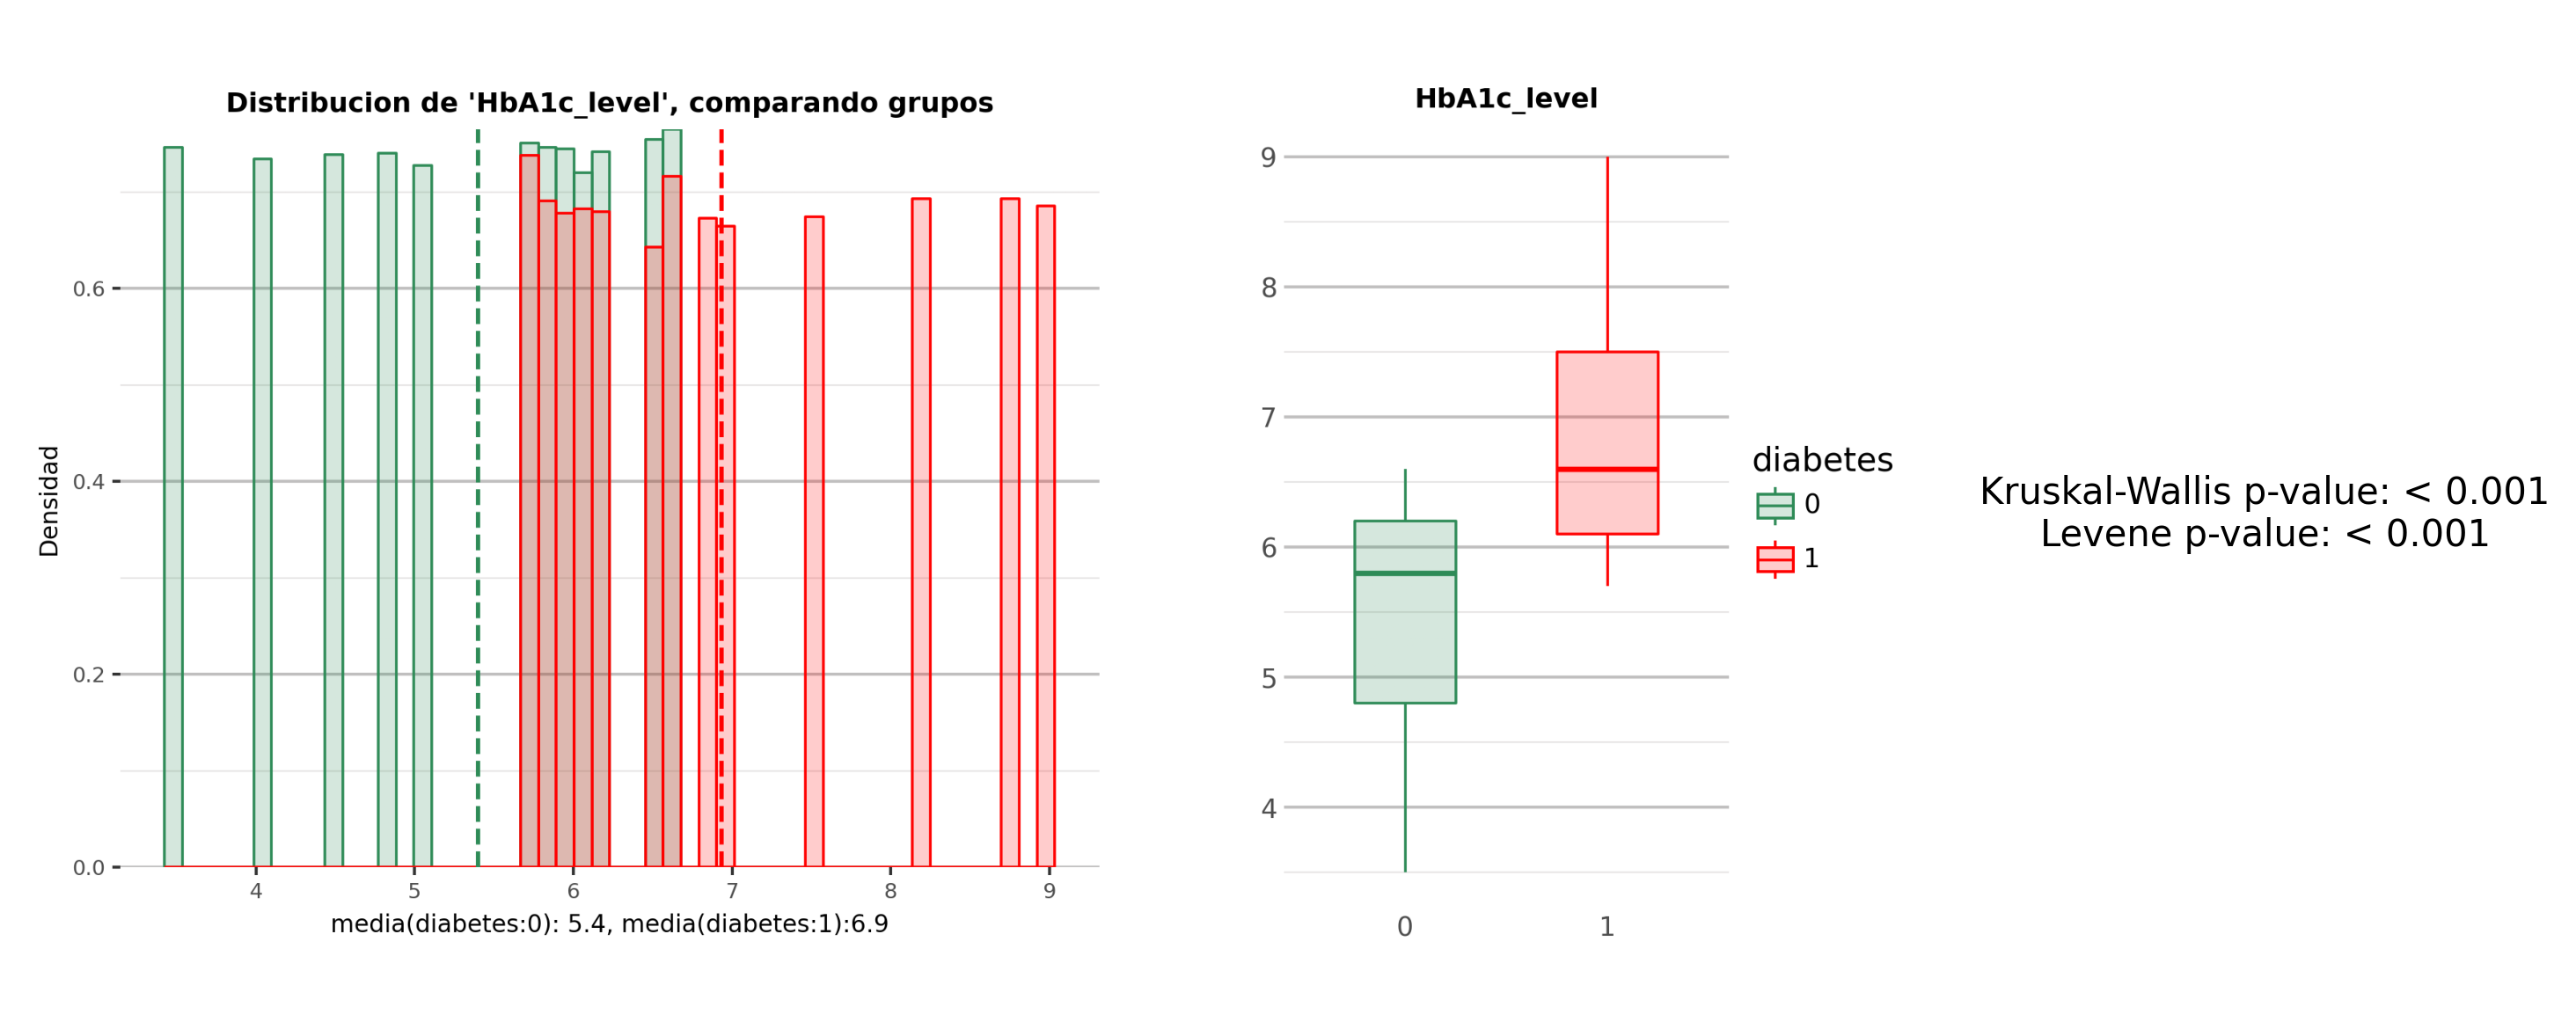

In [98]:
col=numeric_var[2]
hist_per_target_plot = ut.hist_per_target_plot(data,col,'diabetes',colors_per_group,(5,4))
box_per_target_plot = ut.box_per_target_plot(data,col,'diabetes',colors_per_group,(3,4))
desc_text_per_target = ut.desc_text_per_target(data,col,'diabetes')
plot_var_cuantitative =  ut.plot_var_cuantitative(hist_per_target_plot,box_per_target_plot,desc_text_per_target,fig_size_histogram,fig_size_box_plot,fig_size_desc)
plt.tight_layout()
plt.show()

### blood_glucose_level

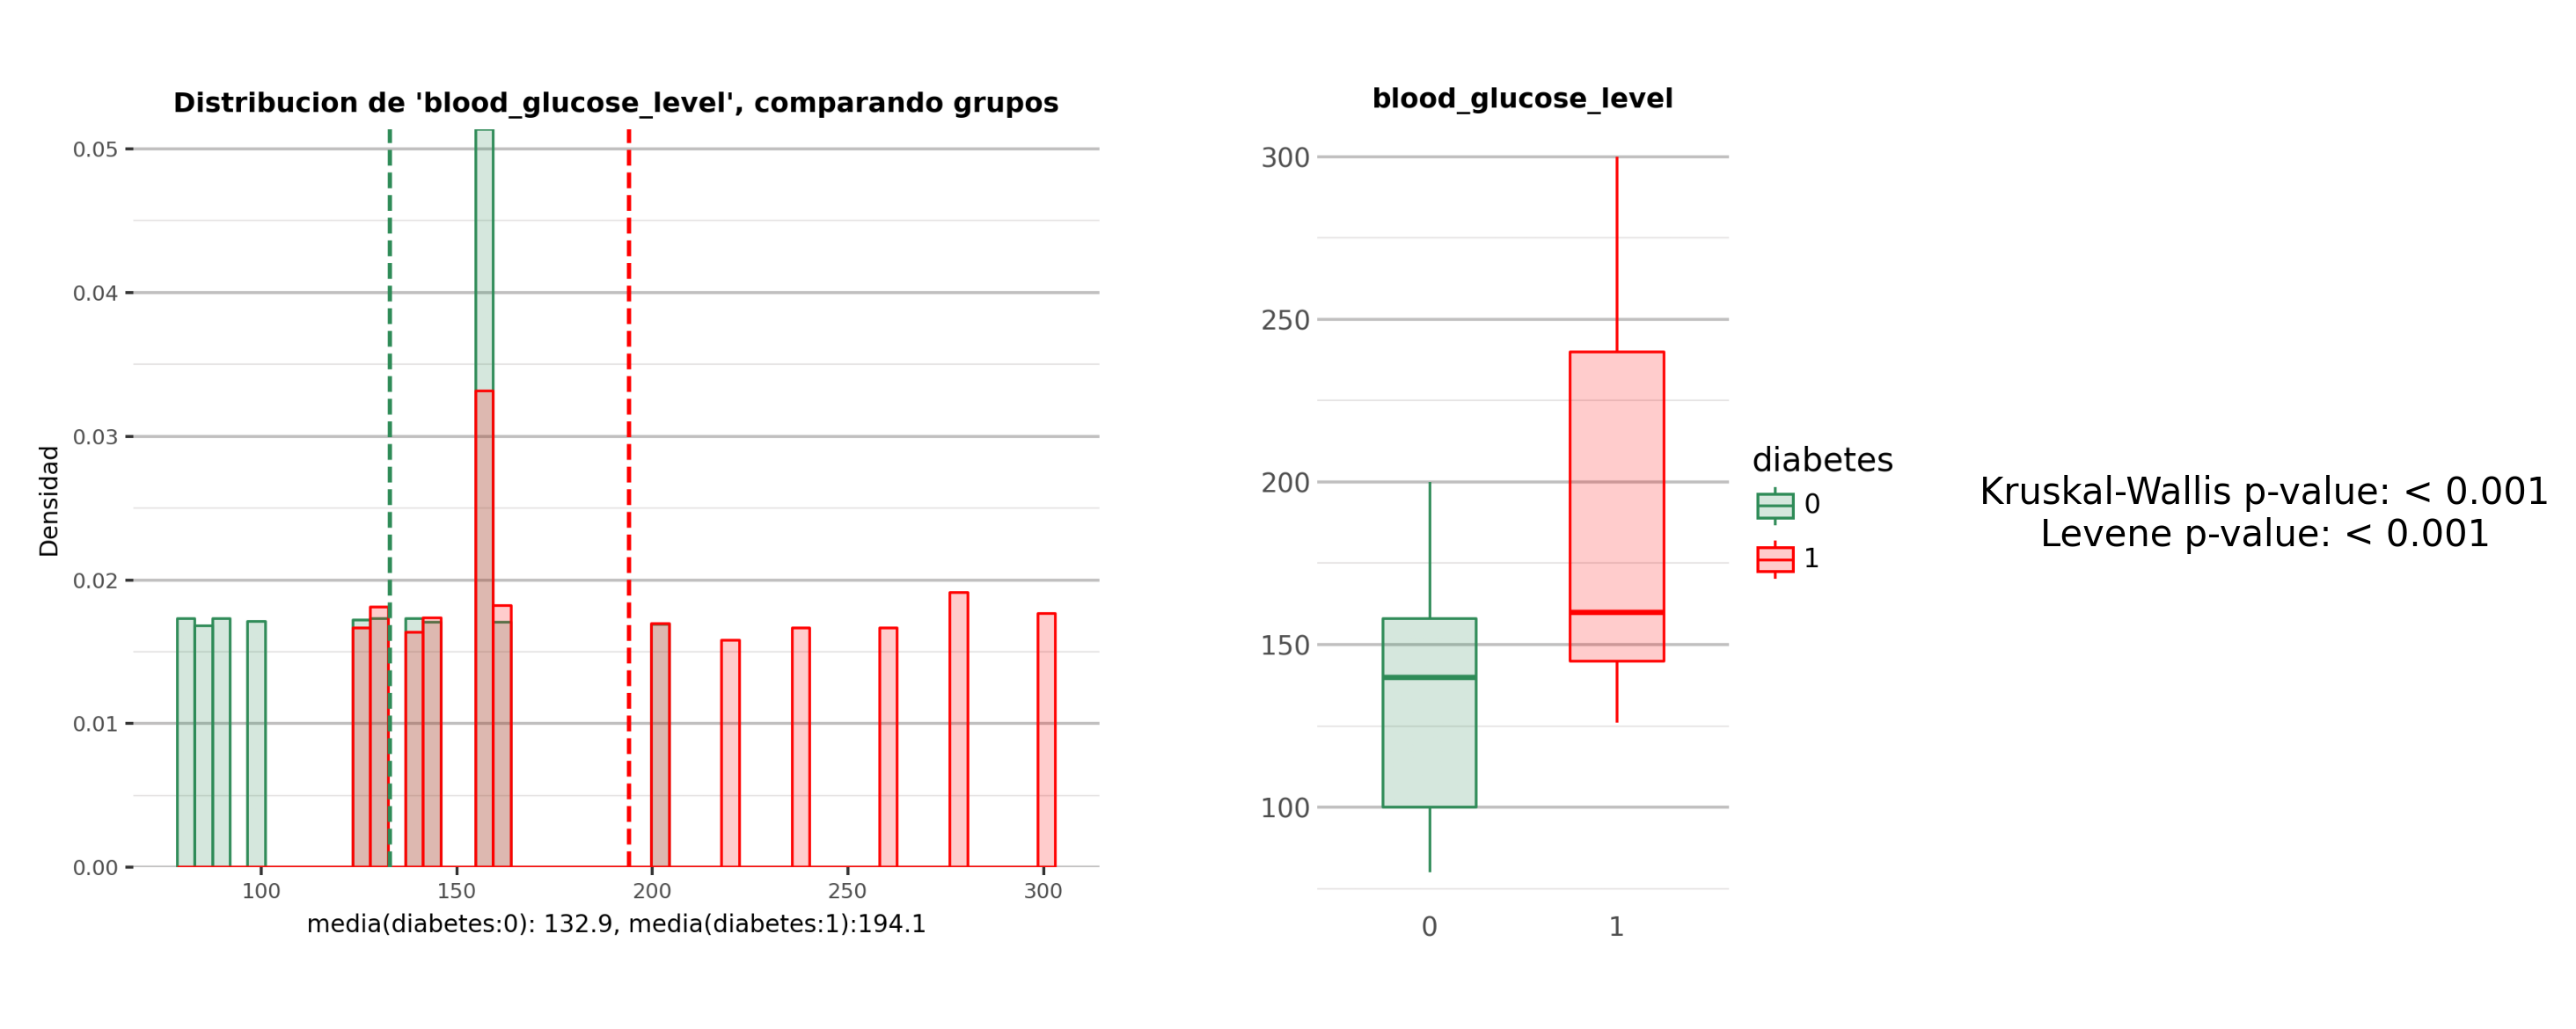

In [99]:
col=numeric_var[3]
hist_per_target_plot = ut.hist_per_target_plot(data,col,'diabetes',colors_per_group,(5,4))
box_per_target_plot = ut.box_per_target_plot(data,col,'diabetes',colors_per_group,(3,4))
desc_text_per_target = ut.desc_text_per_target(data,col,'diabetes')
plot_var_cuantitative =  ut.plot_var_cuantitative(hist_per_target_plot,box_per_target_plot,desc_text_per_target,fig_size_histogram,fig_size_box_plot,fig_size_desc)
plt.tight_layout()
plt.show()

### Matriz de correlación variables continuas

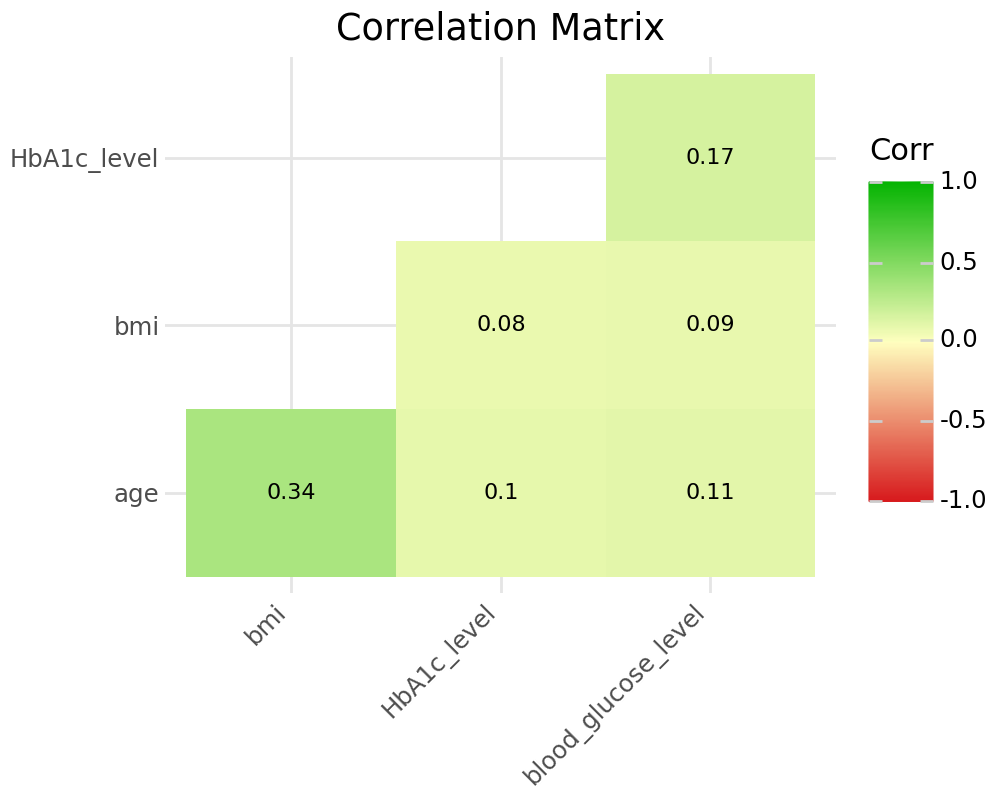

In [ ]:
ut.corr_plot(data,numeric_var,(5,4)).show()

No se observan correlaciones relevantes entre variables continuas, se puede afirmar que son linealmente independientes

### 2.4 Análisis bi-variantes, variables categóricas.

In [ ]:
# Eliminamos diabetes de las variables categoricas
categoric_var.remove('diabetes')

### gender

Frecuencia                        Porcentaje por clase             
diabetes          0     1 Total Frecuencia                    0     1  Total
gender                                                                      
Female        54091  4461            58552                92.38  7.62  100.0
Male          37391  4039            41430                90.25  9.75  100.0
Total         91482  8500            99982                91.50  8.50  100.0

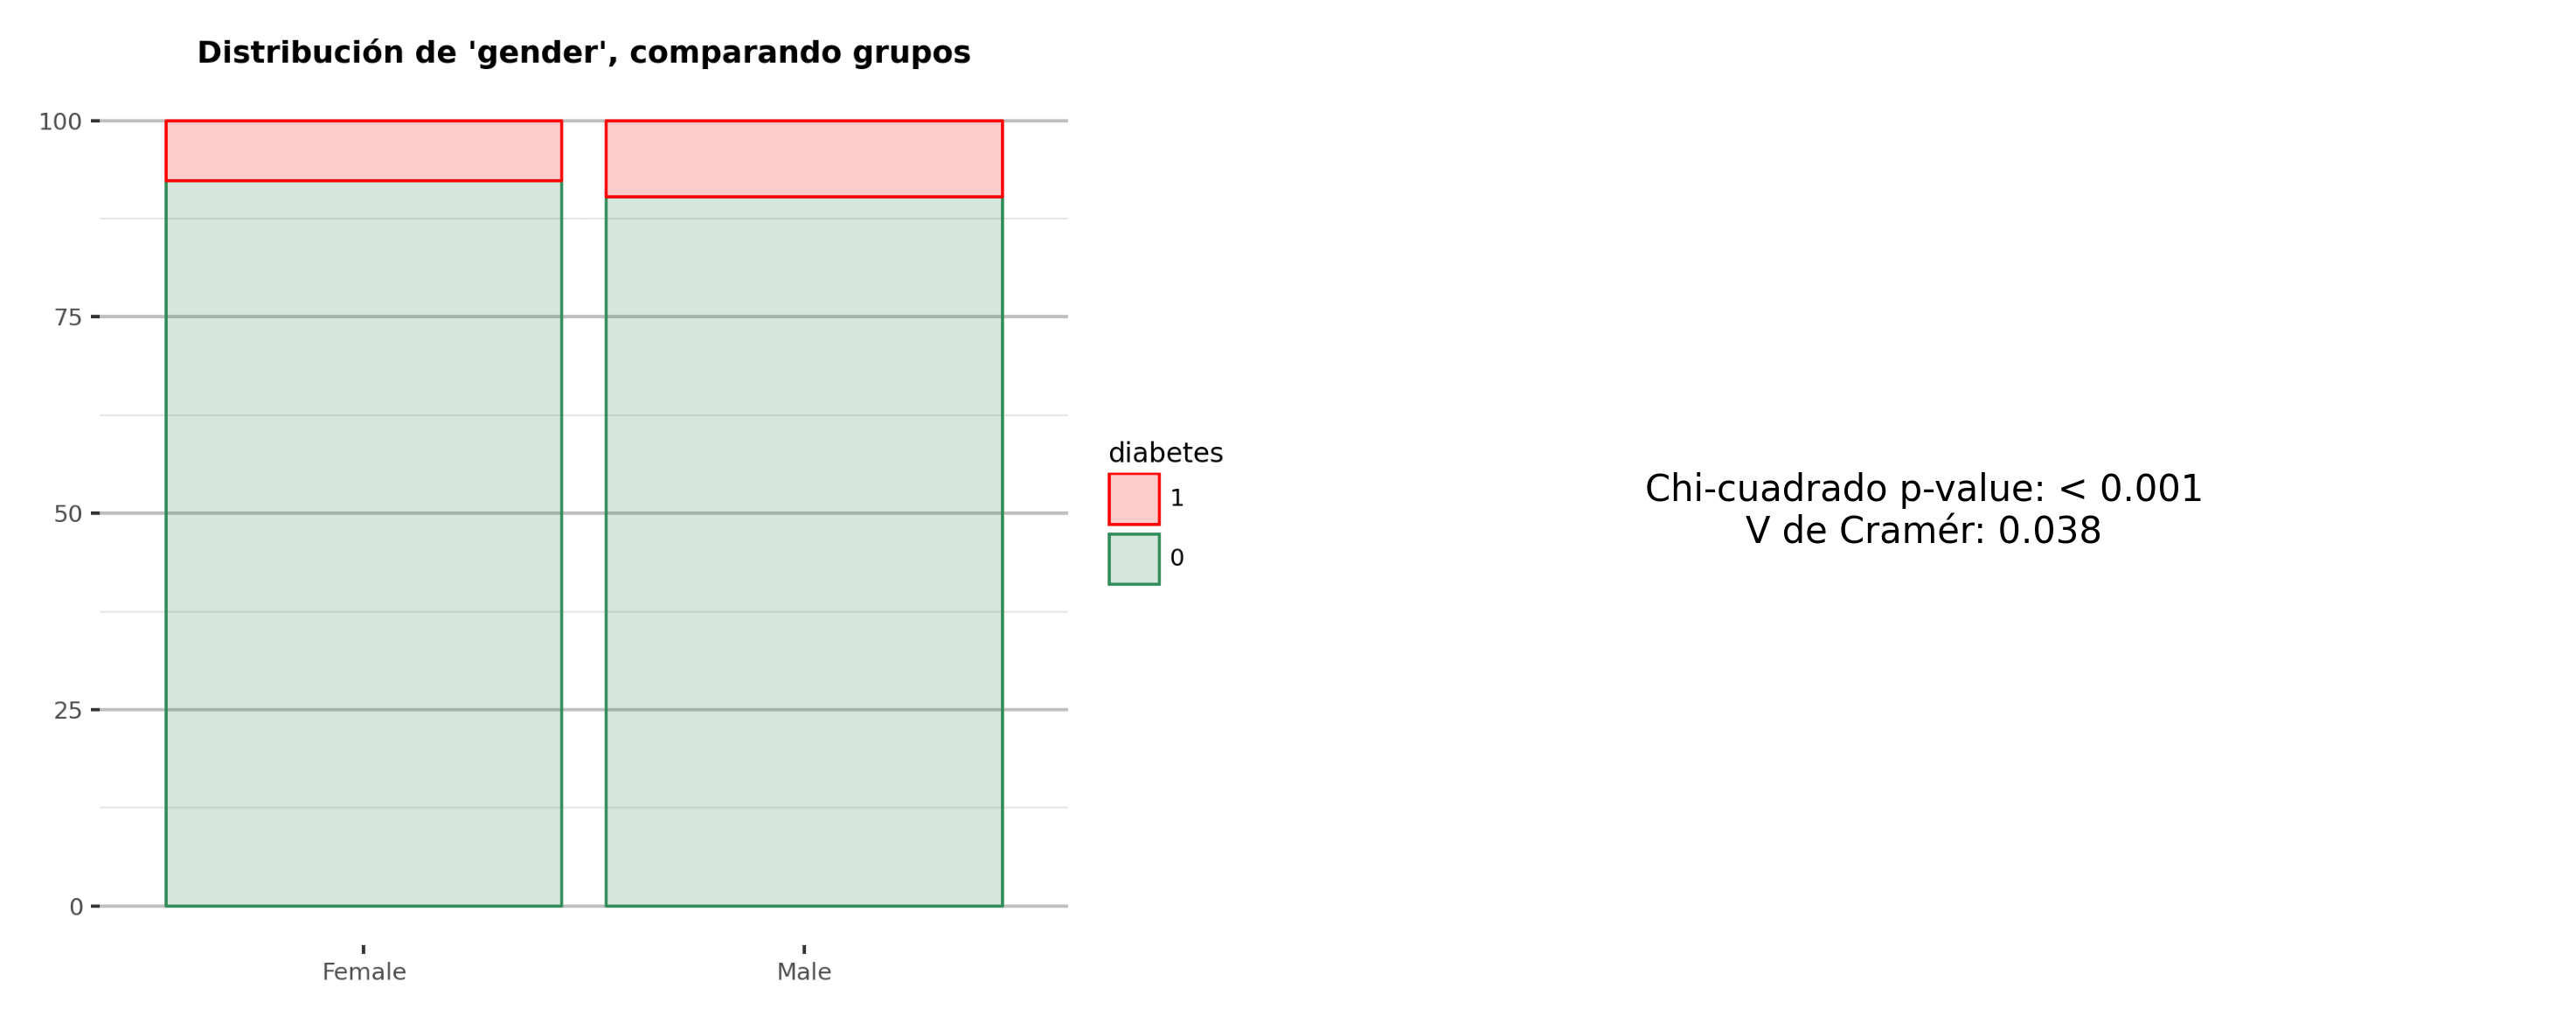

In [101]:
col = categoric_var[0]
cross_tab_per_target = ut.cross_tab_per_target(data,col,'diabetes')
cat_variables_per_group = ut.cat_variables_per_group(data,col,'diabetes',colors_per_group,(5,4))
desc_text_per_target = ut.desc_text_per_target(data,col,'diabetes')
show_all = ut.join_plots([cat_variables_per_group,desc_text_per_target],[(5,4),(5,4)])
display(cross_tab_per_target)
plt.tight_layout()
plt.show()

### smoking_history

Frecuencia                        Porcentaje por clase         \
diabetes                 0     1 Total Frecuencia                    0      1   
smoking_history                                                                 
No Info              34356  1454            35810                95.94   4.06   
current               8338   948             9286                89.79  10.21   
ever                  3531   472             4003                88.21  11.79   
former                7762  1590             9352                83.00  17.00   
never                31746  3346            35092                90.47   9.53   
not current           5749   690             6439                89.28  10.72   
Total                91482  8500            99982                91.50   8.50   

                        
diabetes         Total  
smoking_history         
No Info          100.0  
current          100.0  
ever             100.0  
former           100.0  
never            100.0  
not current      100.0  
Total            100.0

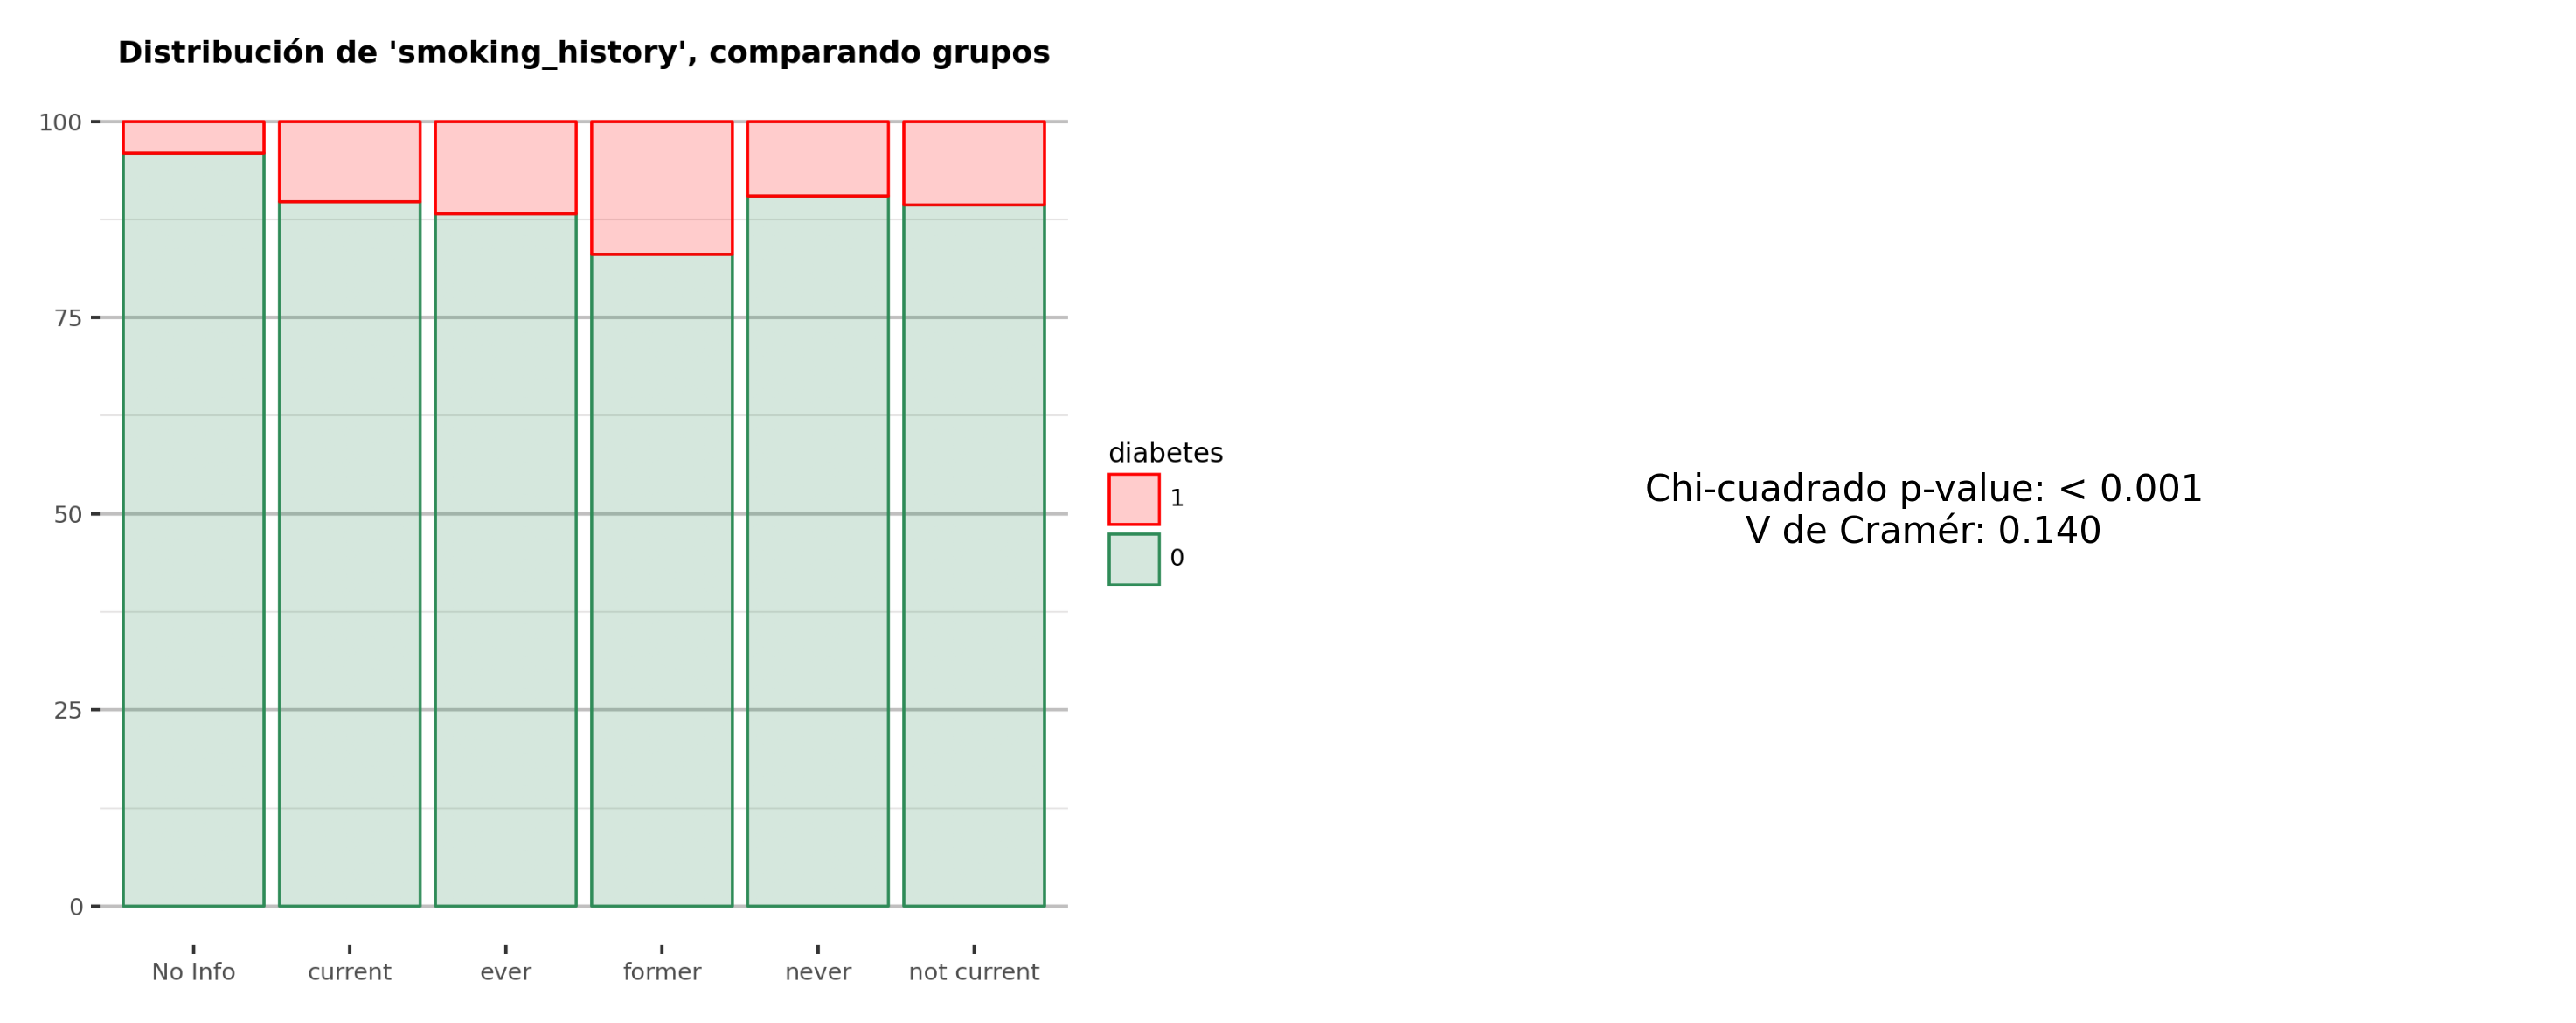

In [102]:
col = categoric_var[1]
cross_tab_per_target = ut.cross_tab_per_target(data,col,'diabetes')
cat_variables_per_group = ut.cat_variables_per_group(data,col,'diabetes',colors_per_group,(5,4))
desc_text_per_target = ut.desc_text_per_target(data,col,'diabetes')
show_all = ut.join_plots([cat_variables_per_group,desc_text_per_target],[(5,4),(5,4)])
display(cross_tab_per_target)
plt.tight_layout()
plt.show()

### hypertension

Frecuencia                        Porcentaje por clase         \
diabetes              0     1 Total Frecuencia                    0      1   
hypertension                                                                 
0                 86085  6412            92497                93.07   6.93   
1                  5397  2088             7485                72.10  27.90   
Total             91482  8500            99982                91.50   8.50   

                     
diabetes      Total  
hypertension         
0             100.0  
1             100.0  
Total         100.0

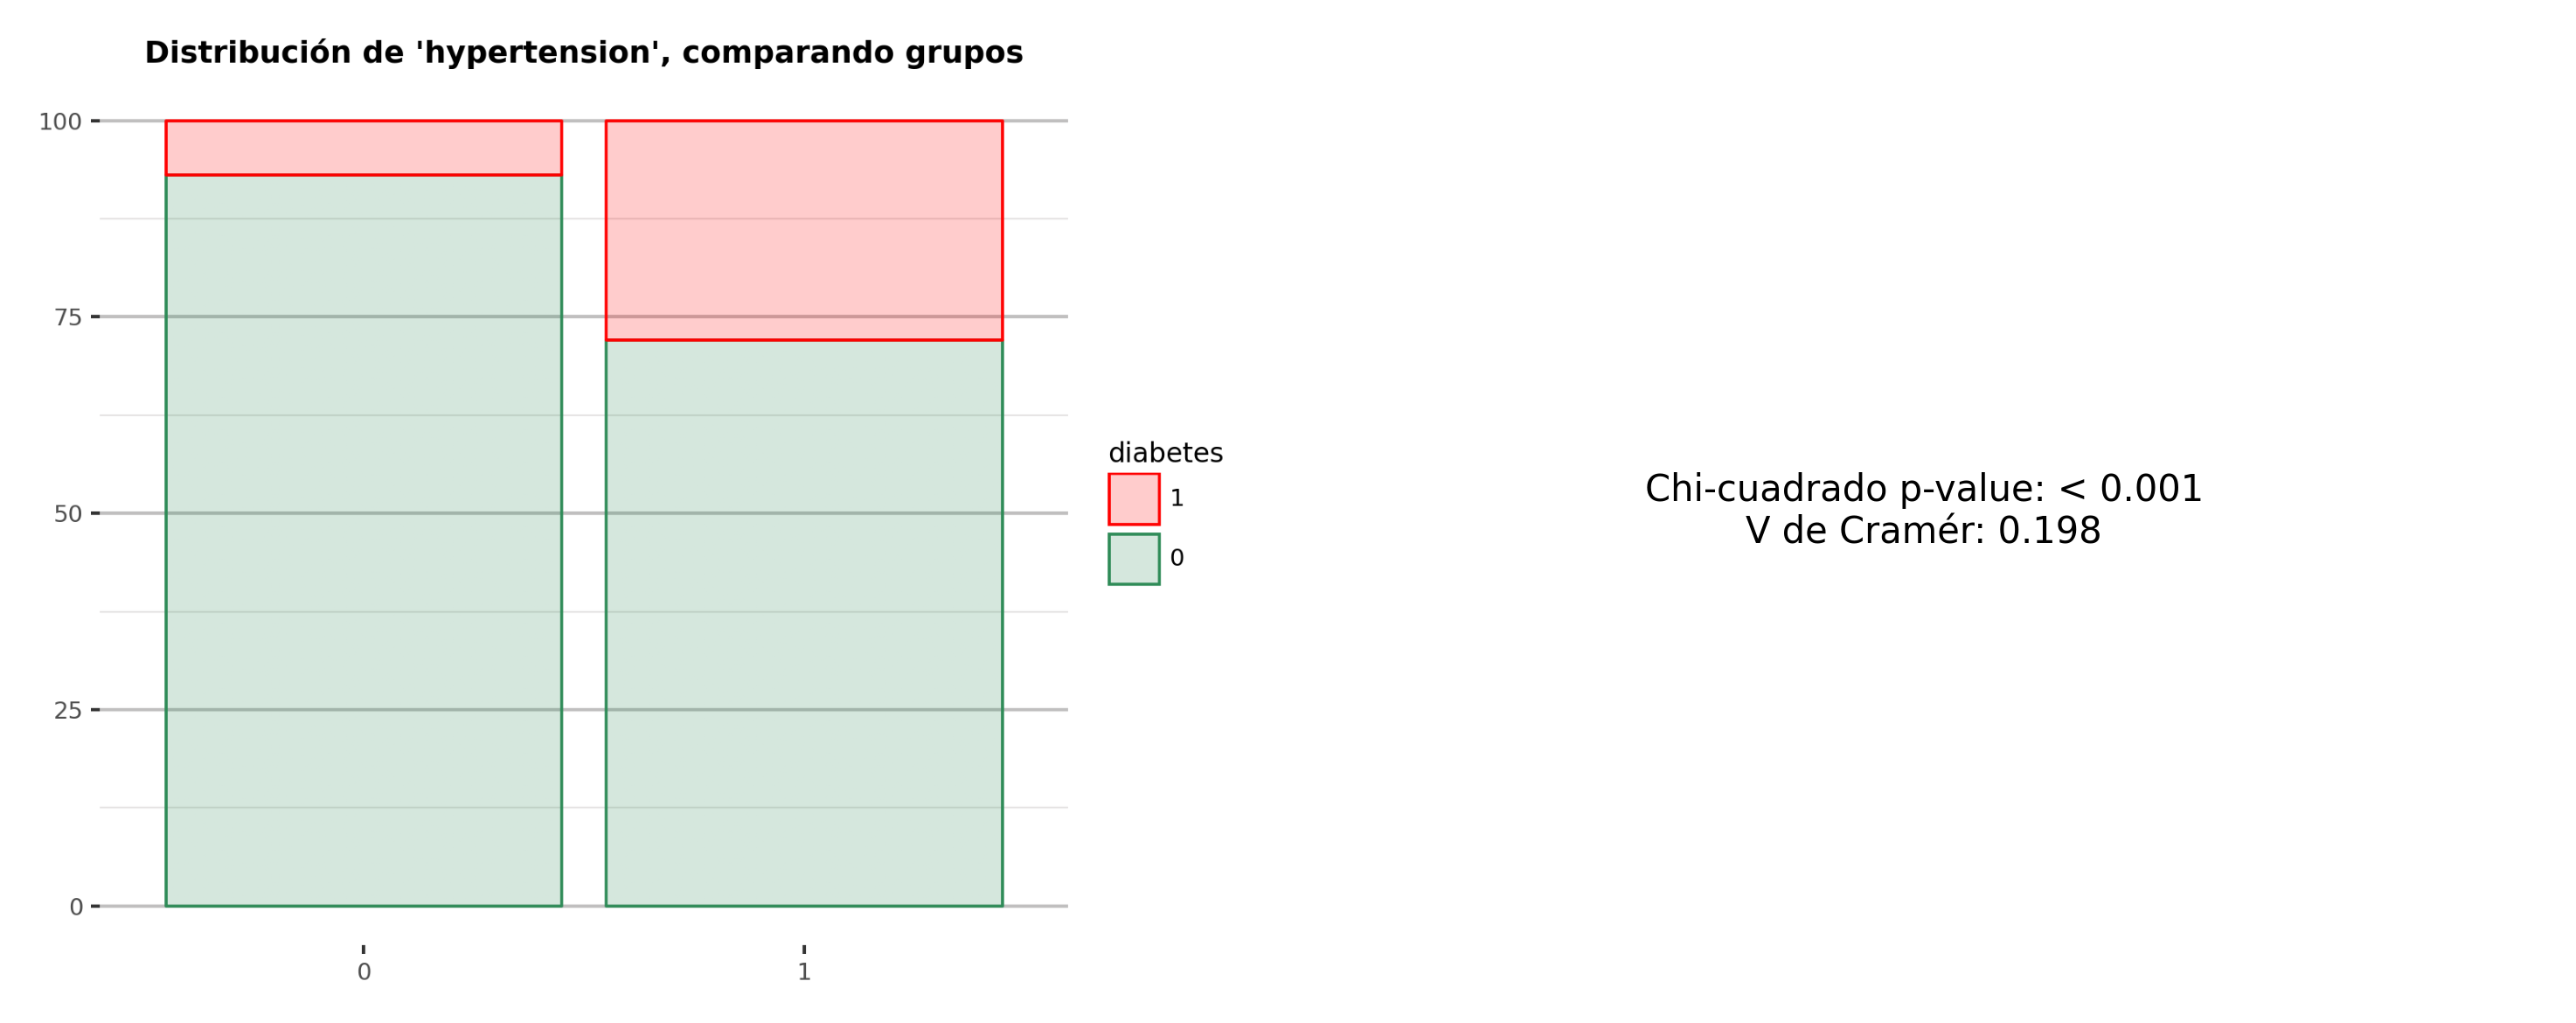

In [107]:
col = categoric_var[2]
cross_tab_per_target = ut.cross_tab_per_target(data,col,'diabetes')
cat_variables_per_group = ut.cat_variables_per_group(data,col,'diabetes',colors_per_group,(5,4))
desc_text_per_target = ut.desc_text_per_target(data,col,'diabetes')
show_all = ut.join_plots([cat_variables_per_group,desc_text_per_target],[(5,4),(5,4)])
display(cross_tab_per_target)
plt.tight_layout()
plt.show()

### heart_disease

Frecuencia                        Porcentaje por clase         \
diabetes               0     1 Total Frecuencia                    0      1   
heart_disease                                                                 
0                  88807  7233            96040                92.47   7.53   
1                   2675  1267             3942                67.86  32.14   
Total              91482  8500            99982                91.50   8.50   

                      
diabetes       Total  
heart_disease         
0              100.0  
1              100.0  
Total          100.0

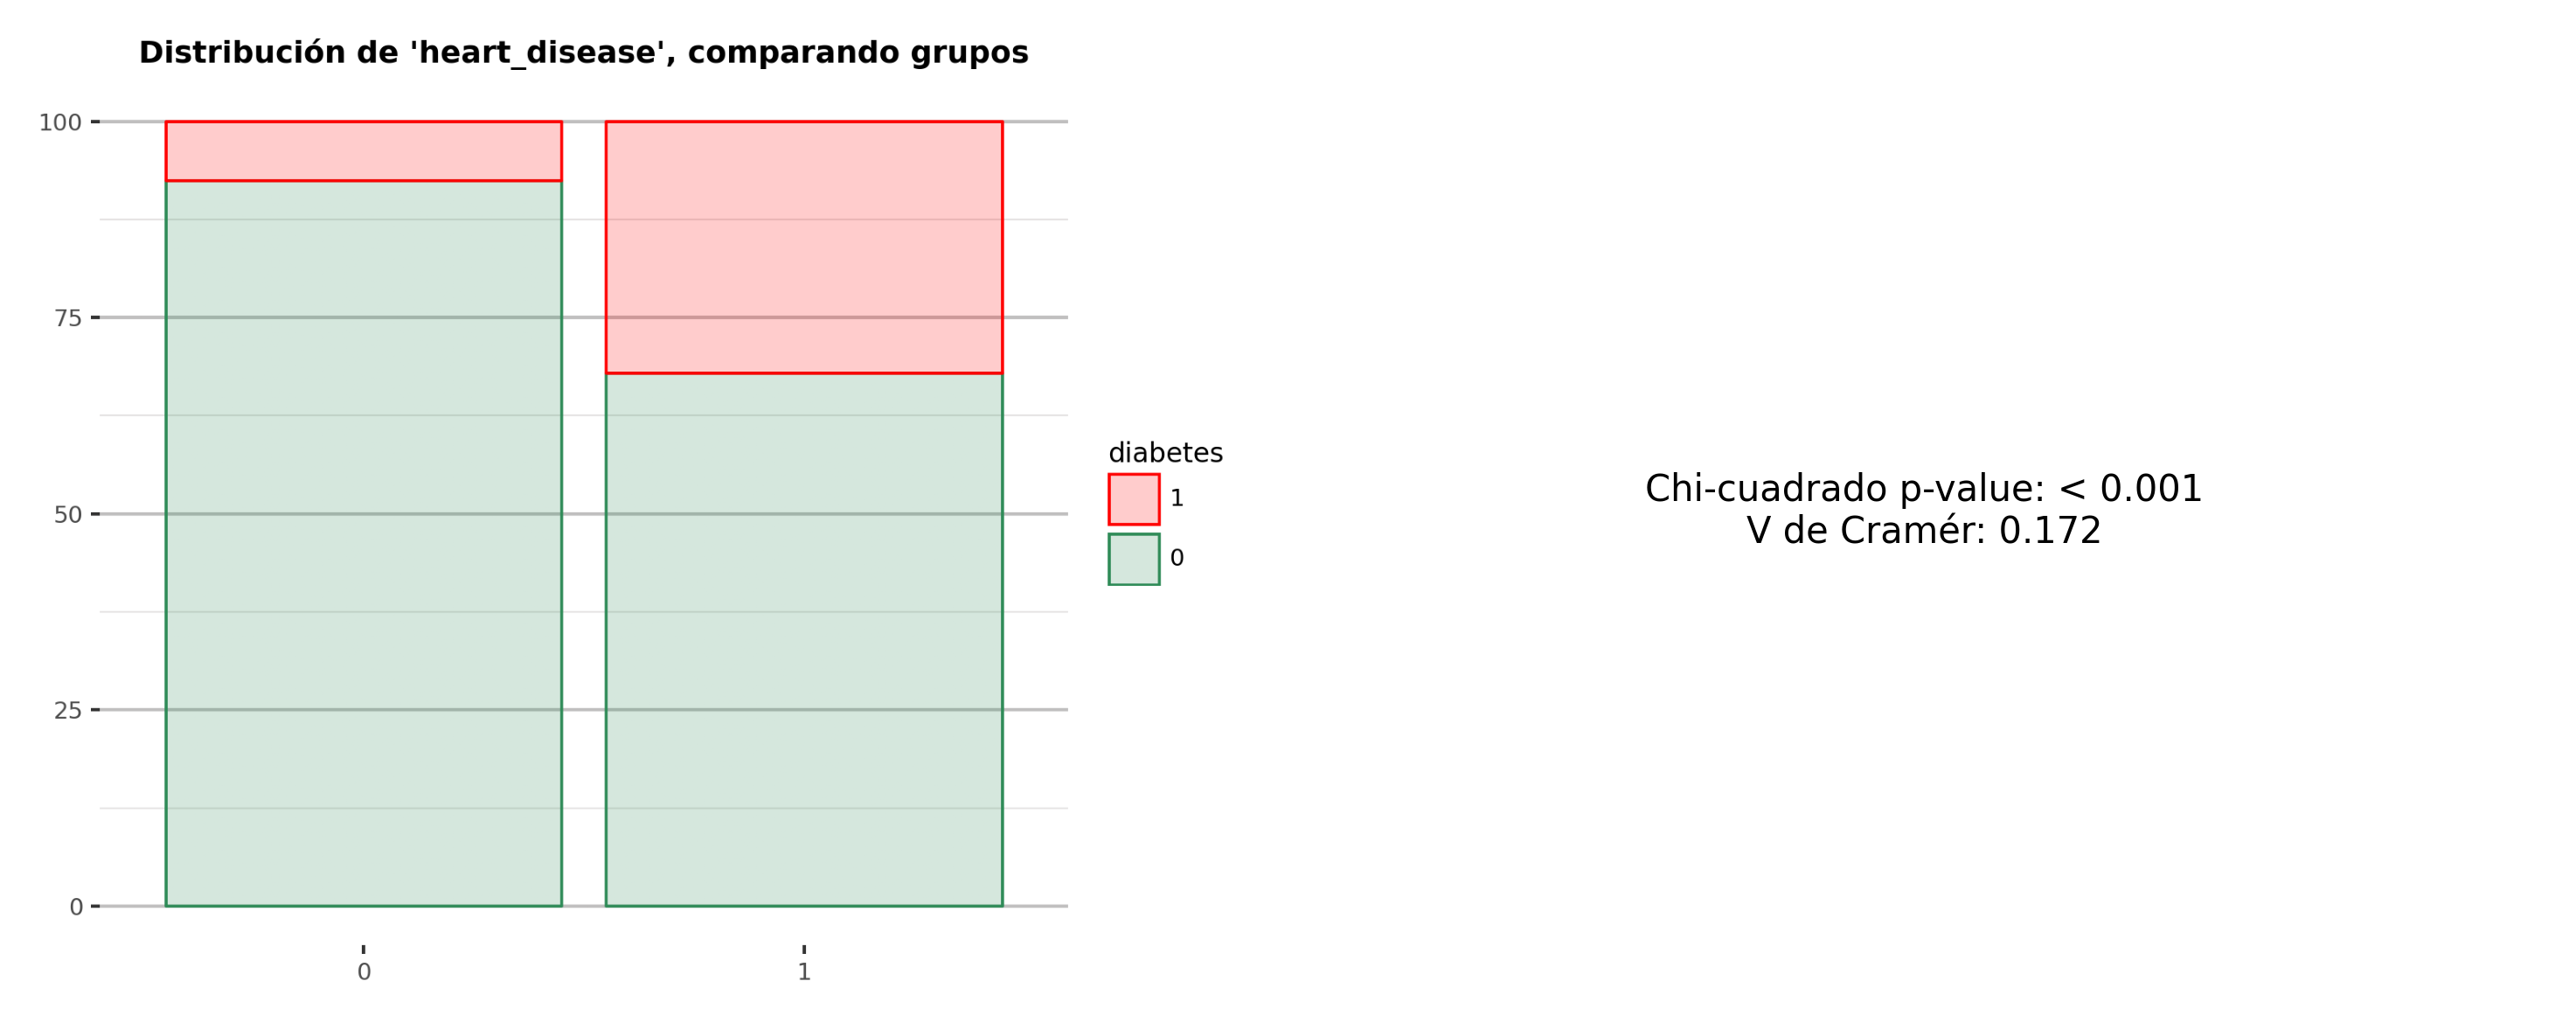

In [108]:
col = categoric_var[3]
cross_tab_per_target = ut.cross_tab_per_target(data,col,'diabetes')
cat_variables_per_group = ut.cat_variables_per_group(data,col,'diabetes',colors_per_group,(5,4))
desc_text_per_target = ut.desc_text_per_target(data,col,'diabetes')
show_all = ut.join_plots([cat_variables_per_group,desc_text_per_target],[(5,4),(5,4)])
display(cross_tab_per_target)
plt.tight_layout()
plt.show()

### HbA1c_level_binned

Frecuencia                        Porcentaje por clase  \
diabetes                    0     1 Total Frecuencia                    0   
HbA1c_level_binned                                                          
(-inf, 5.75)            45558   704            46262                98.48   
[5.75, 6.55)            38070  3218            41288                92.21   
[6.55, inf)              7854  4578            12432                63.18   
Total                   91482  8500            99982                91.50   

                                  
diabetes                1  Total  
HbA1c_level_binned                
(-inf, 5.75)         1.52  100.0  
[5.75, 6.55)         7.79  100.0  
[6.55, inf)         36.82  100.0  
Total                8.50  100.0

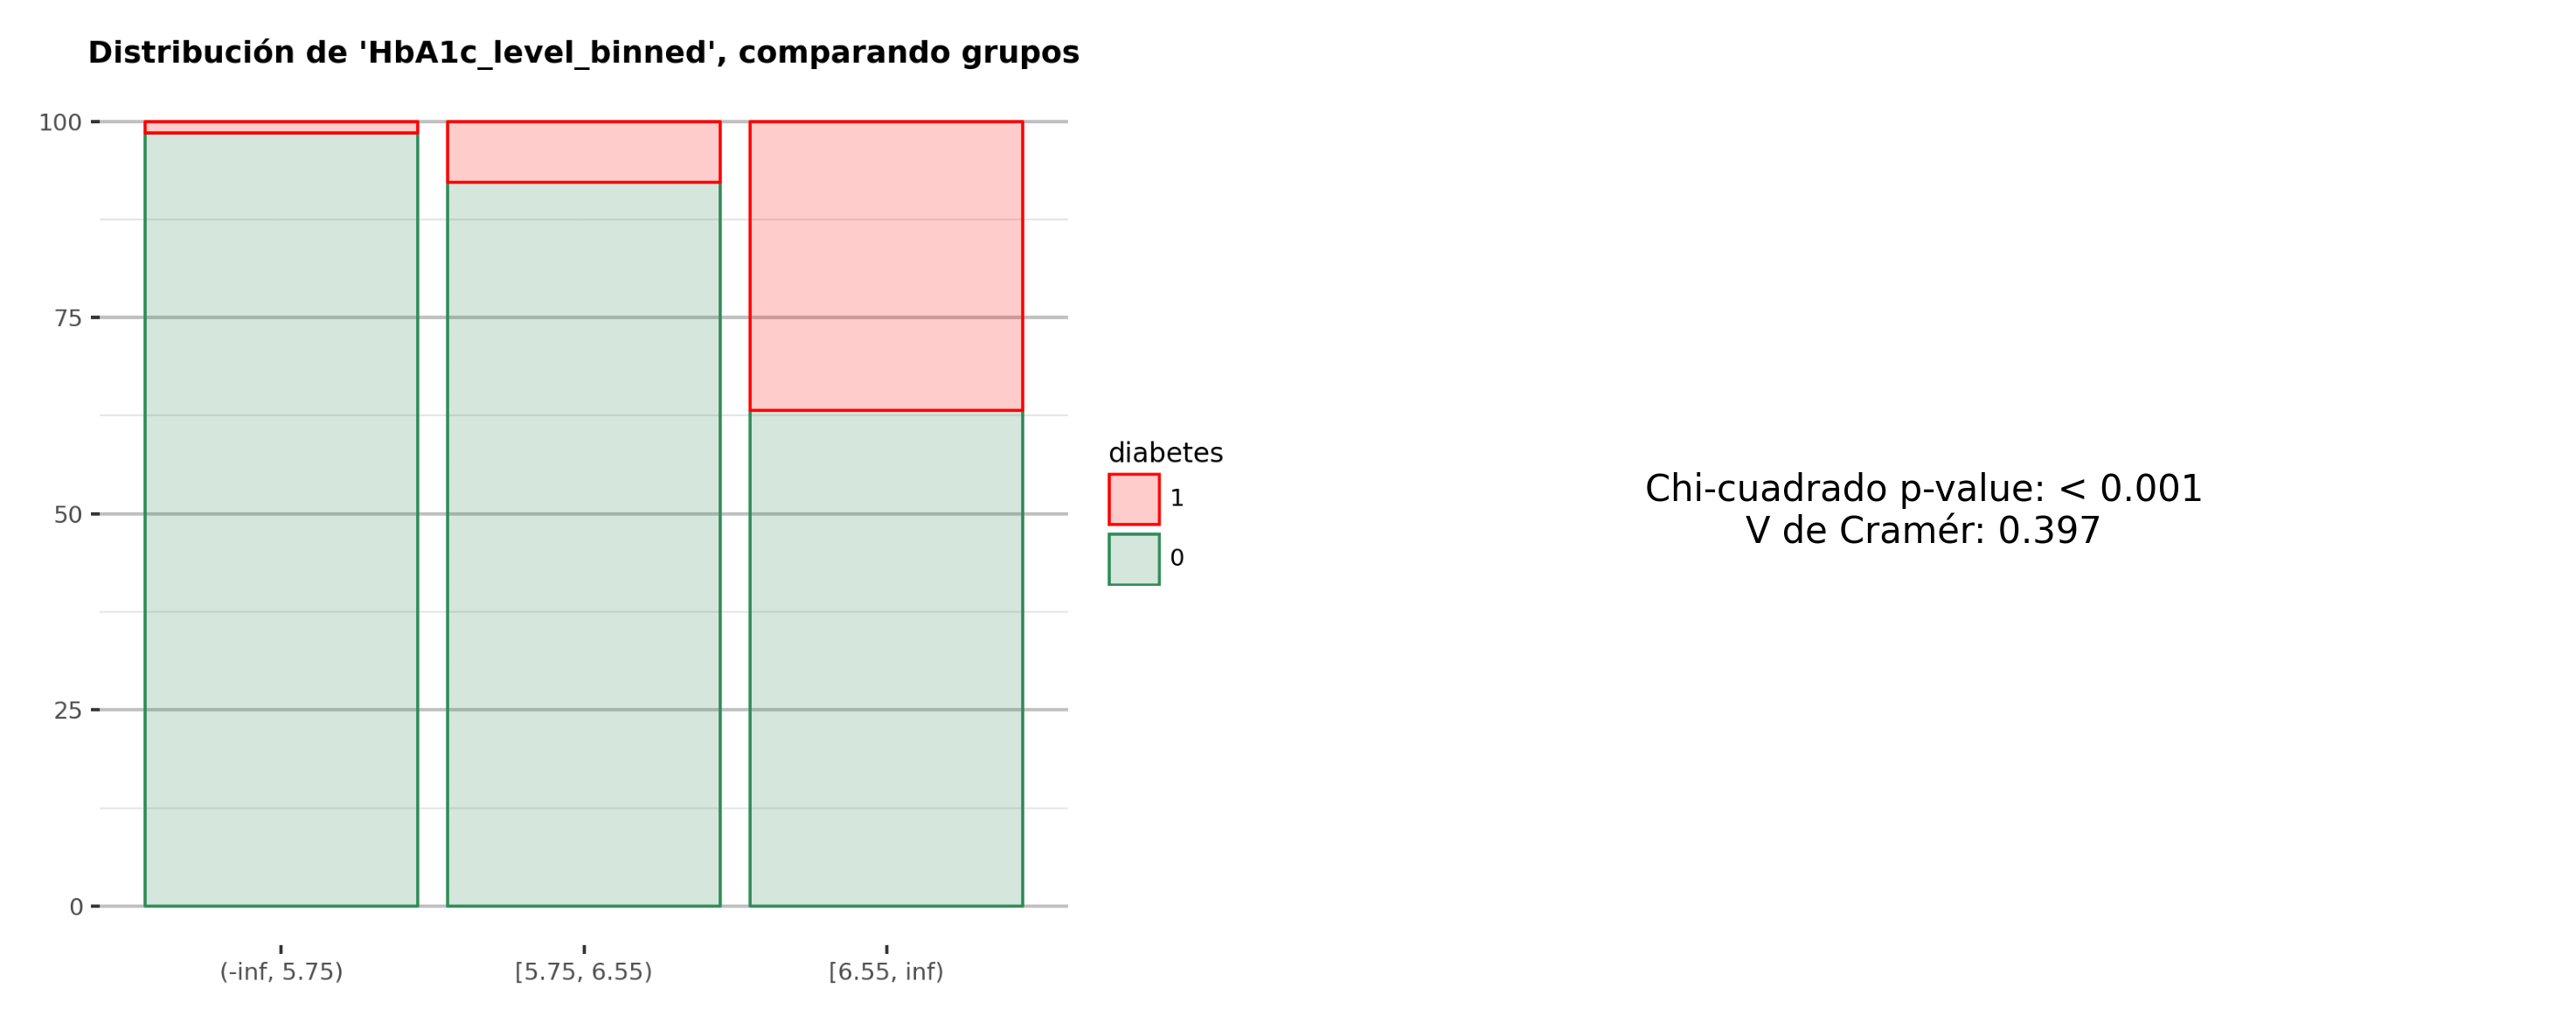

In [152]:
col = 'HbA1c_level_binned'
cross_tab_per_target = ut.cross_tab_per_target(data,col,'diabetes')
cat_variables_per_group = ut.cat_variables_per_group(data,col,'diabetes',colors_per_group,(5,4))
desc_text_per_target = ut.desc_text_per_target(data,col,'diabetes')
show_all = ut.join_plots([cat_variables_per_group,desc_text_per_target],[(5,4),(5,4)])
display(cross_tab_per_target)
plt.tight_layout()
plt.show()

### blood_glucose_level_binned

Frecuencia                         \
diabetes                            0     1 Total Frecuencia   
blood_glucose_level_binned                                     
(-inf, 128.00)                  35204   636            35840   
[128.00, 159.50)                42314  3244            45558   
[159.50, 180.00)                 7012   696             7708   
[180.00, inf)                    6952  3924            10876   
Total                           91482  8500            99982   

                           Porcentaje por clase                
diabetes                                      0      1  Total  
blood_glucose_level_binned                                     
(-inf, 128.00)                            98.23   1.77  100.0  
[128.00, 159.50)                          92.88   7.12  100.0  
[159.50, 180.00)                          90.97   9.03  100.0  
[180.00, inf)                             63.92  36.08  100.0  
Total                                     91.50   8.50  100.0

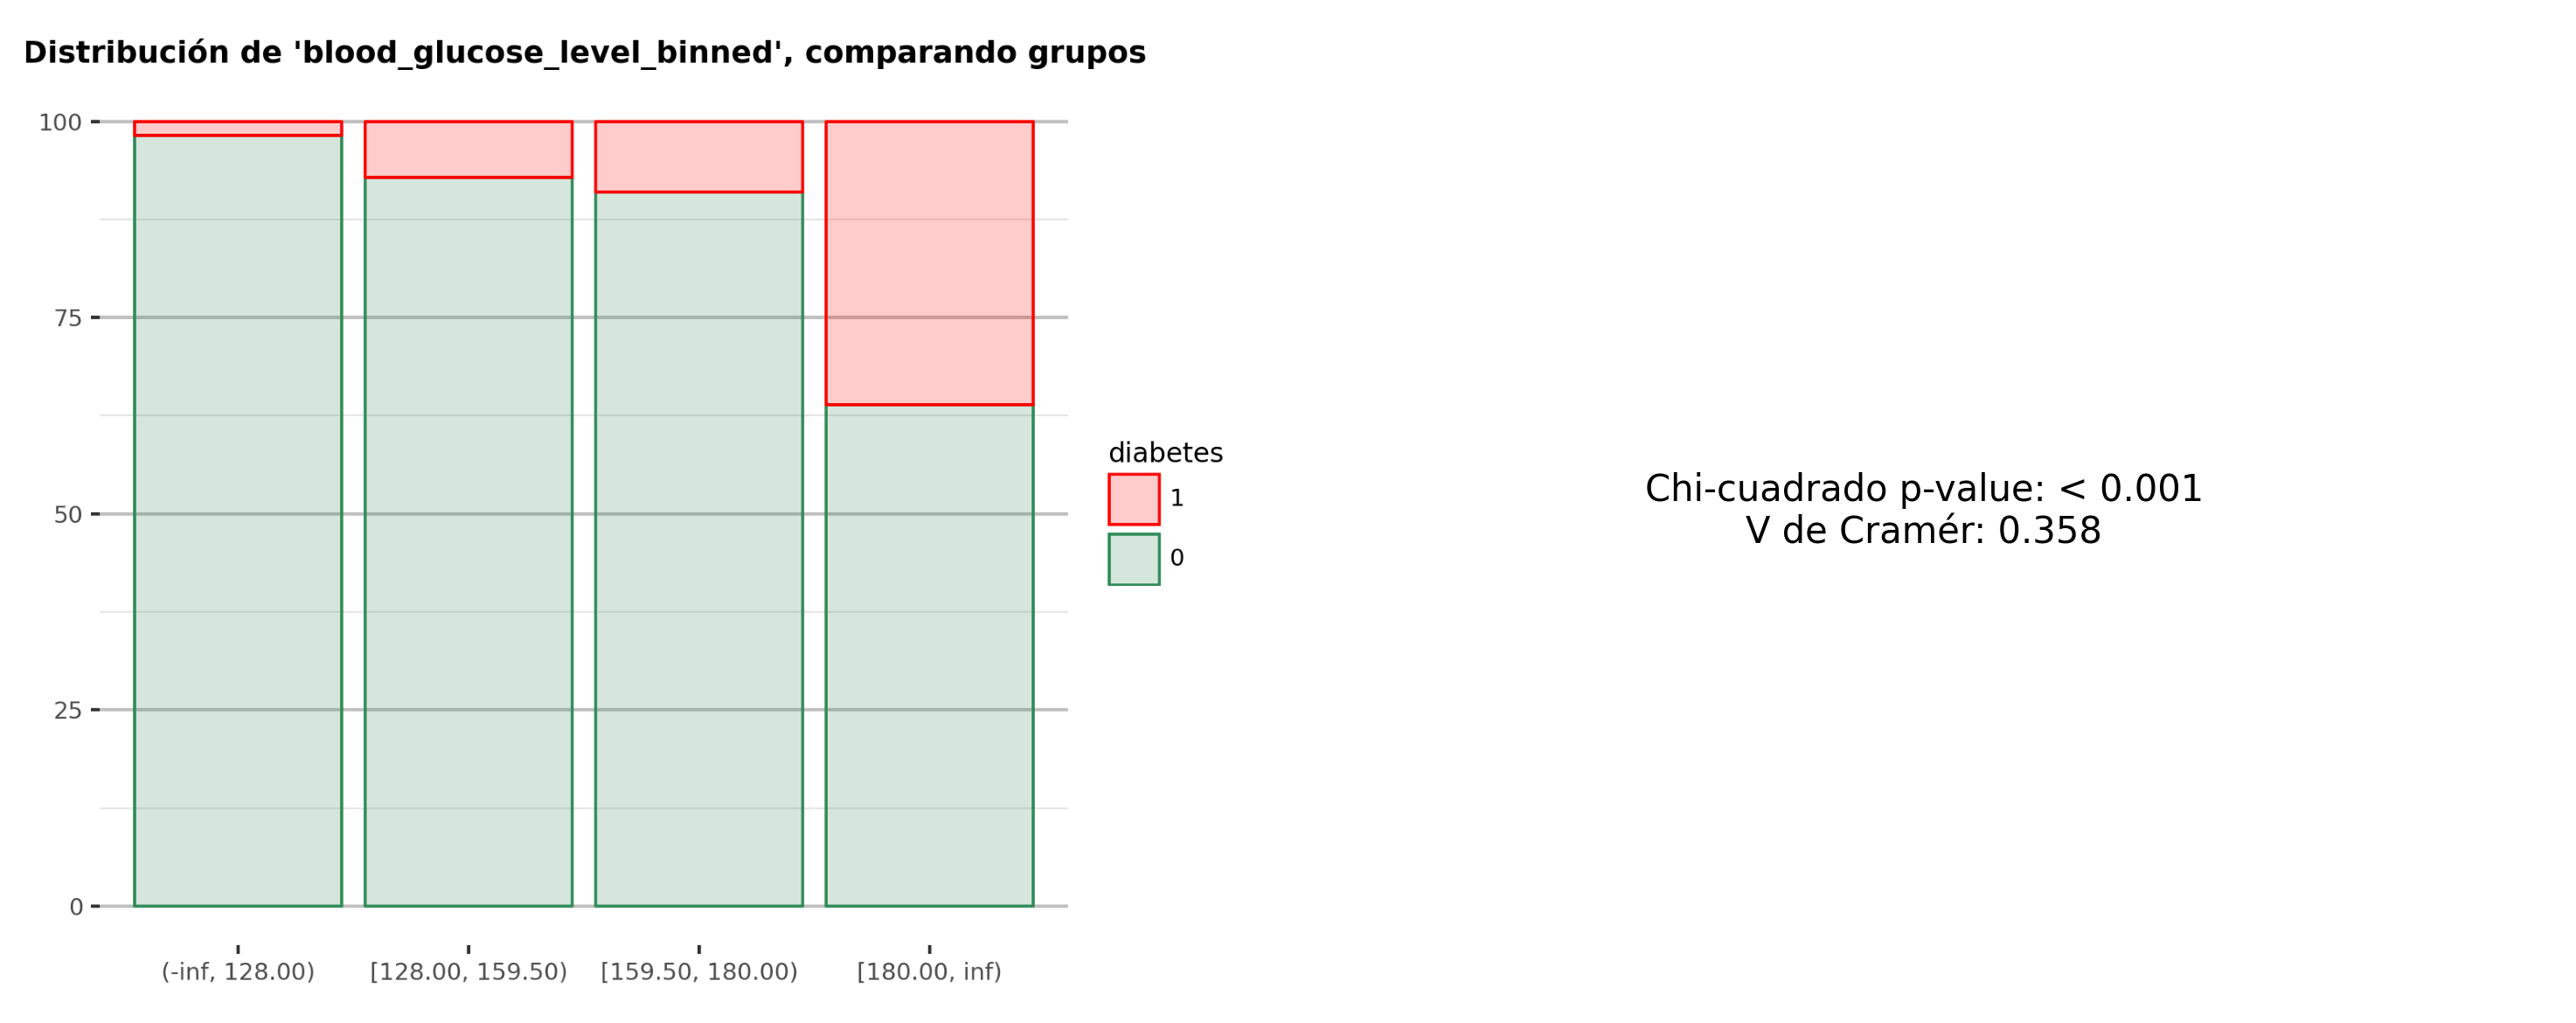

In [153]:
col = 'blood_glucose_level_binned'
cross_tab_per_target = ut.cross_tab_per_target(data,col,'diabetes')
cat_variables_per_group = ut.cat_variables_per_group(data,col,'diabetes',colors_per_group,(5,4))
desc_text_per_target = ut.desc_text_per_target(data,col,'diabetes')
show_all = ut.join_plots([cat_variables_per_group,desc_text_per_target],[(5,4),(5,4)])
display(cross_tab_per_target)
plt.tight_layout()
plt.show()